In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from datetime import datetime

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from matplotlib import rcParams
pd.set_option('display.max_columns', None)


rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
data = pd.read_csv('data.csv', sep=';')

# Dokumentasi & Catatan

## 01. Info Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


## 02. Pengelompokan Dataset

In [6]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['job','marital','education','default','housing','loan','contact','poutcome','y']
nums = ['age','balance','duration','campaign','pdays','previous']
timestamp = ['day','month']

## 03. Sample / Describe

In [7]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
21460,49,services,married,tertiary,no,306,yes,no,cellular,18,aug,285,7,-1,0,unknown,no
17924,42,services,single,unknown,no,974,no,no,cellular,30,jul,73,2,-1,0,unknown,no
10216,58,retired,married,primary,no,5092,no,no,unknown,11,jun,199,6,-1,0,unknown,no
48672,34,technician,single,secondary,no,5039,no,no,cellular,20,nov,205,6,-1,0,unknown,no
47858,52,management,married,tertiary,no,575,no,no,unknown,3,jun,315,1,-1,0,unknown,no
12109,52,self-employed,married,primary,no,1750,no,yes,unknown,20,jun,39,5,-1,0,unknown,no
26869,30,blue-collar,single,primary,no,0,yes,no,cellular,20,nov,1329,2,-1,0,unknown,no
28009,41,admin.,single,secondary,no,219,yes,no,cellular,28,jan,119,1,268,1,other,no
47675,23,technician,single,tertiary,no,1129,yes,no,unknown,28,may,806,1,-1,0,unknown,yes
21436,33,self-employed,married,secondary,no,173,no,no,cellular,18,aug,26,5,-1,0,unknown,no


In [8]:
data[nums].describe()

,age,balance,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
data[cats].describe()

,job,marital,education,default,housing,loan,contact,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,40664,43922


## 04. Adjustment Dataset

In [10]:
data['pdays'] = data['pdays'].replace(-1, 0)

In [11]:
data[nums].describe()

,age,balance,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,258.690179,2.766549,40.976192,0.576892
std,10.615008,3041.608766,257.743149,3.099075,99.791228,2.254838
min,18.000000,-8019.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1431.000000,320.000000,3.000000,0.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


# Feature Engineering

## a. Feature Selection

## b. Feature Extraction

### - Fitur Kelas Usia (01)

In [12]:
#segmentasi age
def categorize_age(age):
    if 5 <= age <= 20:
        return 'usia remaja'
    elif 21 <= age <= 55:
        return 'usia produktif'
    elif 56 <= age <= 65:
        return 'usia pensiun'
    else:
        return 'pensiun' 

data['kategori_usia'] = data['age'].apply(categorize_age)

In [13]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,kategori_usia
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no,usia pensiun
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no,usia produktif
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no,usia produktif
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no,usia produktif
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no,usia produktif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,0,0,unknown,no,usia produktif
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,0,0,unknown,no,usia pensiun
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,0,0,unknown,no,usia pensiun
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,usia produktif


In [14]:
data['kategori_usia'].value_counts()

usia produktif    44233
usia pensiun       4561
pensiun             834
usia remaja         104
Name: kategori_usia, dtype: int64

### - Fitur Kelas Segmentasi (02)

In [15]:
# Fungsi Negative Balance
def negative_balance(balance):
    if balance <= 0:
        return 'Saldo Negatif'
    else:
        return None

# Fungsi Positif Balance    
def positive_balance(balance):
    if balance <= quantiles[0.25]:
        return 'SES - D'
    elif balance <= quantiles[0.5]:
        return 'SES - C'
    elif balance <= quantiles[0.75]:
        return 'SES - B'
    else:
        return 'SES - A'

In [16]:
# Ambil data balance yang positif
positive_balances = data[data['balance'] > 0]['balance']

# Pembagian 4 kelompok kuantil
quantiles = positive_balances.quantile([0.25, 0.5, 0.75])

In [17]:
data['kategori_pendapatan'] = data['balance'].apply(negative_balance)

# Terapkan fungsi untuk balance positif
data.loc[data['balance'] > 0, 'kategori_pendapatan'] = data[data['balance'] > 0]['balance'].apply(positive_balance)

In [18]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,kategori_usia,kategori_pendapatan
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no,usia pensiun,SES - A
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no,usia produktif,SES - D
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no,usia produktif,SES - D
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no,usia produktif,SES - B
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no,usia produktif,SES - D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,0,0,unknown,no,usia produktif,Saldo Negatif
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,0,0,unknown,no,usia pensiun,Saldo Negatif
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,0,0,unknown,no,usia pensiun,SES - C
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,usia produktif,SES - B


In [19]:
data['kategori_pendapatan'].value_counts()

SES - D          10455
SES - B          10434
SES - A          10429
SES - C          10411
Saldo Negatif     8003
Name: kategori_pendapatan, dtype: int64

### - Fitur Generasi (03)

In [20]:
tahun_sekarang = datetime.now().year
data['tahun_lahir'] = tahun_sekarang - data['age']

In [21]:
def determine_generation(year_of_birth):
    if 1918 <= year_of_birth <= 1945:
        return 'Pre Boomers'
    elif 1946 <= year_of_birth <= 1964:
        return 'Baby Boomers'
    elif 1965 <= year_of_birth <= 1980:
        return 'Gen X'
    elif 1981 <= year_of_birth <= 1996:
        return 'Millennials (Gen Y)'
    elif 1997 <= year_of_birth <= 2012:
        return 'Gen Z'
    elif year_of_birth > 2012:
        return 'Gen Alpha'
    else:
        return 'Unknown'

# apply kolom 'generasi' ke dataset
data['generasi'] = data['tahun_lahir'].apply(determine_generation)

## c. Kesimpulan Feature Engineering

In [22]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,kategori_usia,kategori_pendapatan,tahun_lahir,generasi
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no,usia pensiun,SES - A,1966,Gen X
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no,usia produktif,SES - D,1980,Gen X
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no,usia produktif,SES - D,1991,Millennials (Gen Y)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no,usia produktif,SES - B,1977,Gen X
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no,usia produktif,SES - D,1991,Millennials (Gen Y)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,0,0,unknown,no,usia produktif,Saldo Negatif,1991,Millennials (Gen Y)
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,0,0,unknown,no,usia pensiun,Saldo Negatif,1967,Gen X
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,0,0,unknown,no,usia pensiun,SES - C,1967,Gen X
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,usia produktif,SES - B,1996,Millennials (Gen Y)


# Data Cleansing

## a. Handle Missing Value

In [23]:
data.isna().sum()

age                    0
job                    0
marital                0
education              0
default                0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
y                      0
kategori_usia          0
kategori_pendapatan    0
tahun_lahir            0
generasi               0
dtype: int64

## b. Handle Duplicated Data

In [24]:
data.duplicated().sum()

4521

In [25]:
# Info Setelah di handle duplicate
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  49732 non-null  int64 
 1   job                  49732 non-null  object
 2   marital              49732 non-null  object
 3   education            49732 non-null  object
 4   default              49732 non-null  object
 5   balance              49732 non-null  int64 
 6   housing              49732 non-null  object
 7   loan                 49732 non-null  object
 8   contact              49732 non-null  object
 9   day                  49732 non-null  int64 
 10  month                49732 non-null  object
 11  duration             49732 non-null  int64 
 12  campaign             49732 non-null  int64 
 13  pdays                49732 non-null  int64 
 14  previous             49732 non-null  int64 
 15  poutcome             49732 non-null  object
 16  y   

## c. Handle Outlier

### - Outlier Checking (Numerik)

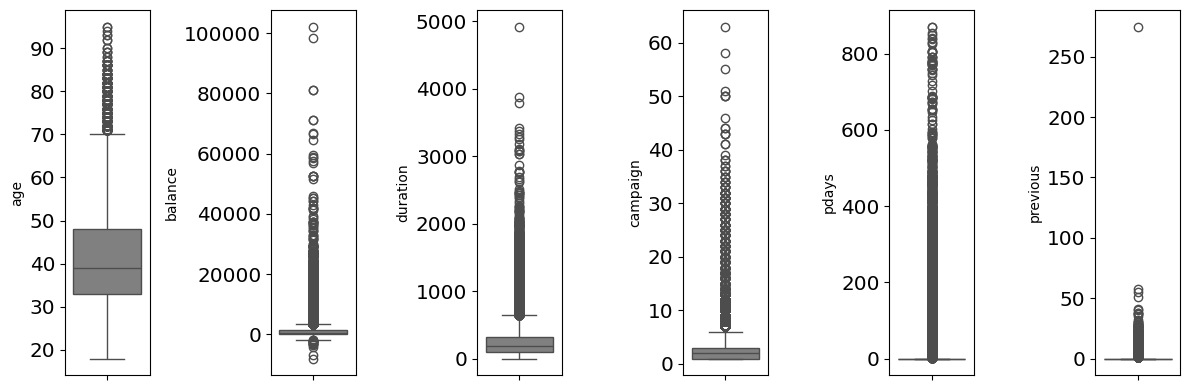

In [26]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()
    
plt.show()

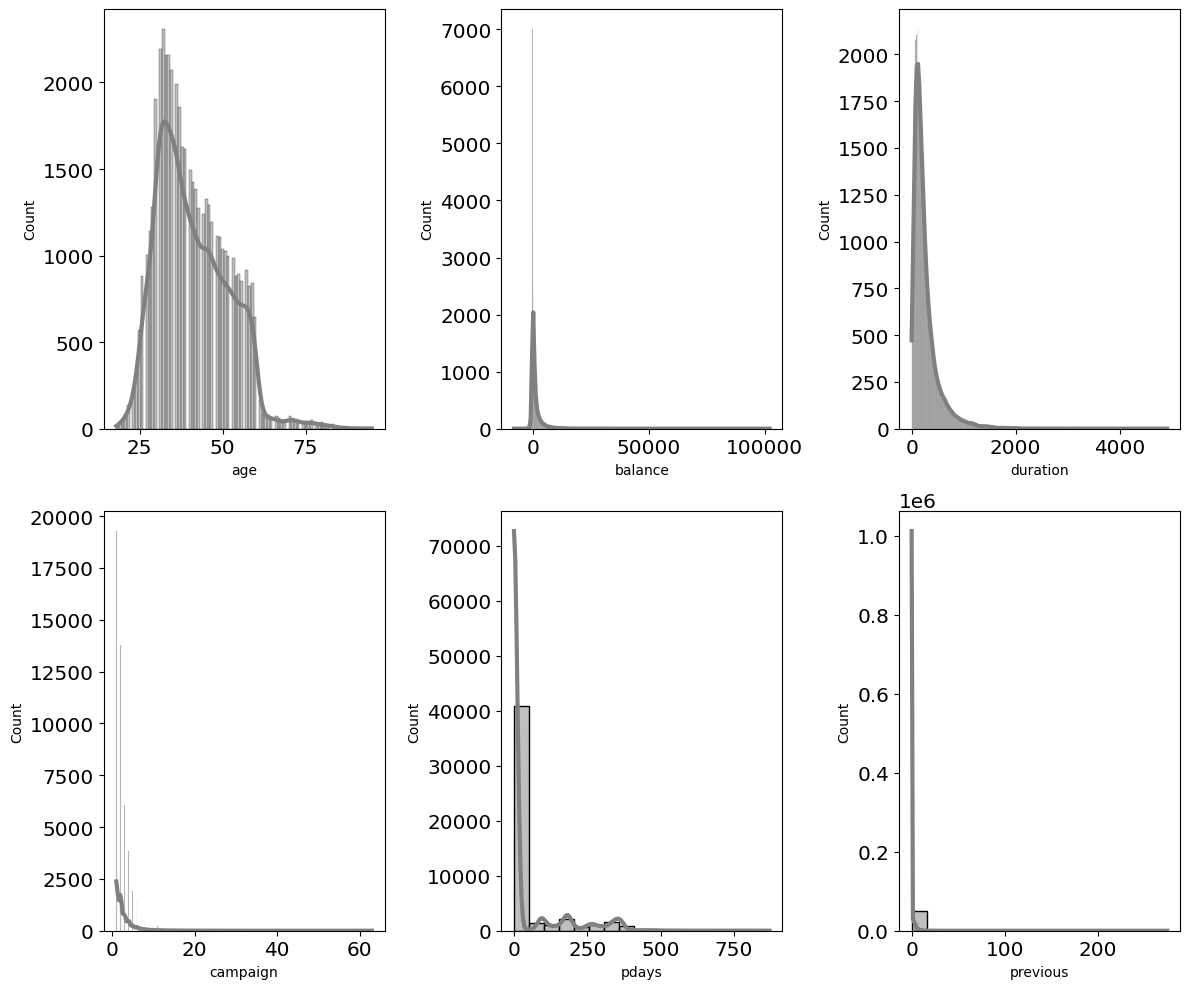

In [27]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

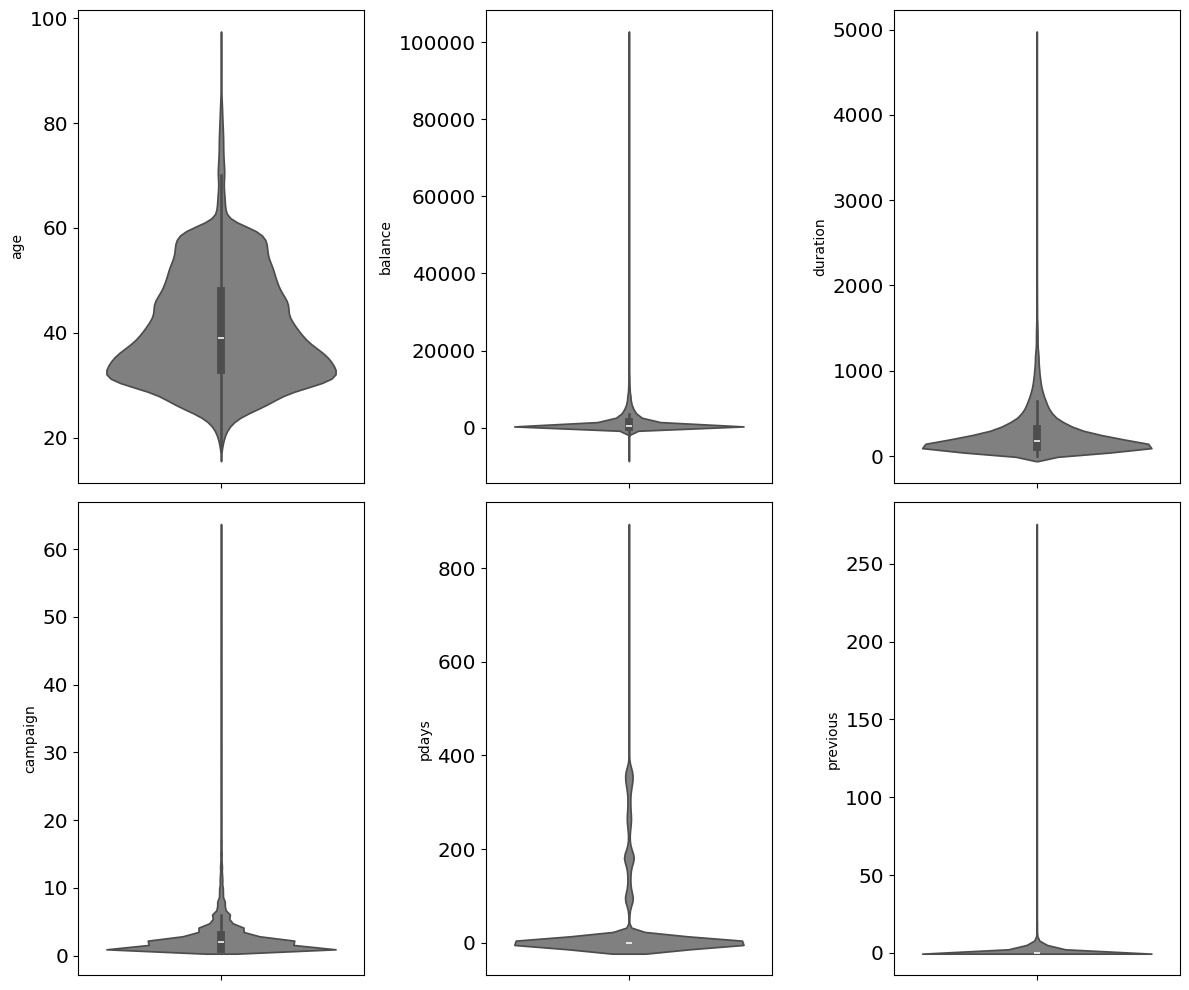

In [28]:
plt.figure(figsize=(12, 10))
num_columns = 3

for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

### - Outlier Checking (Kategori)

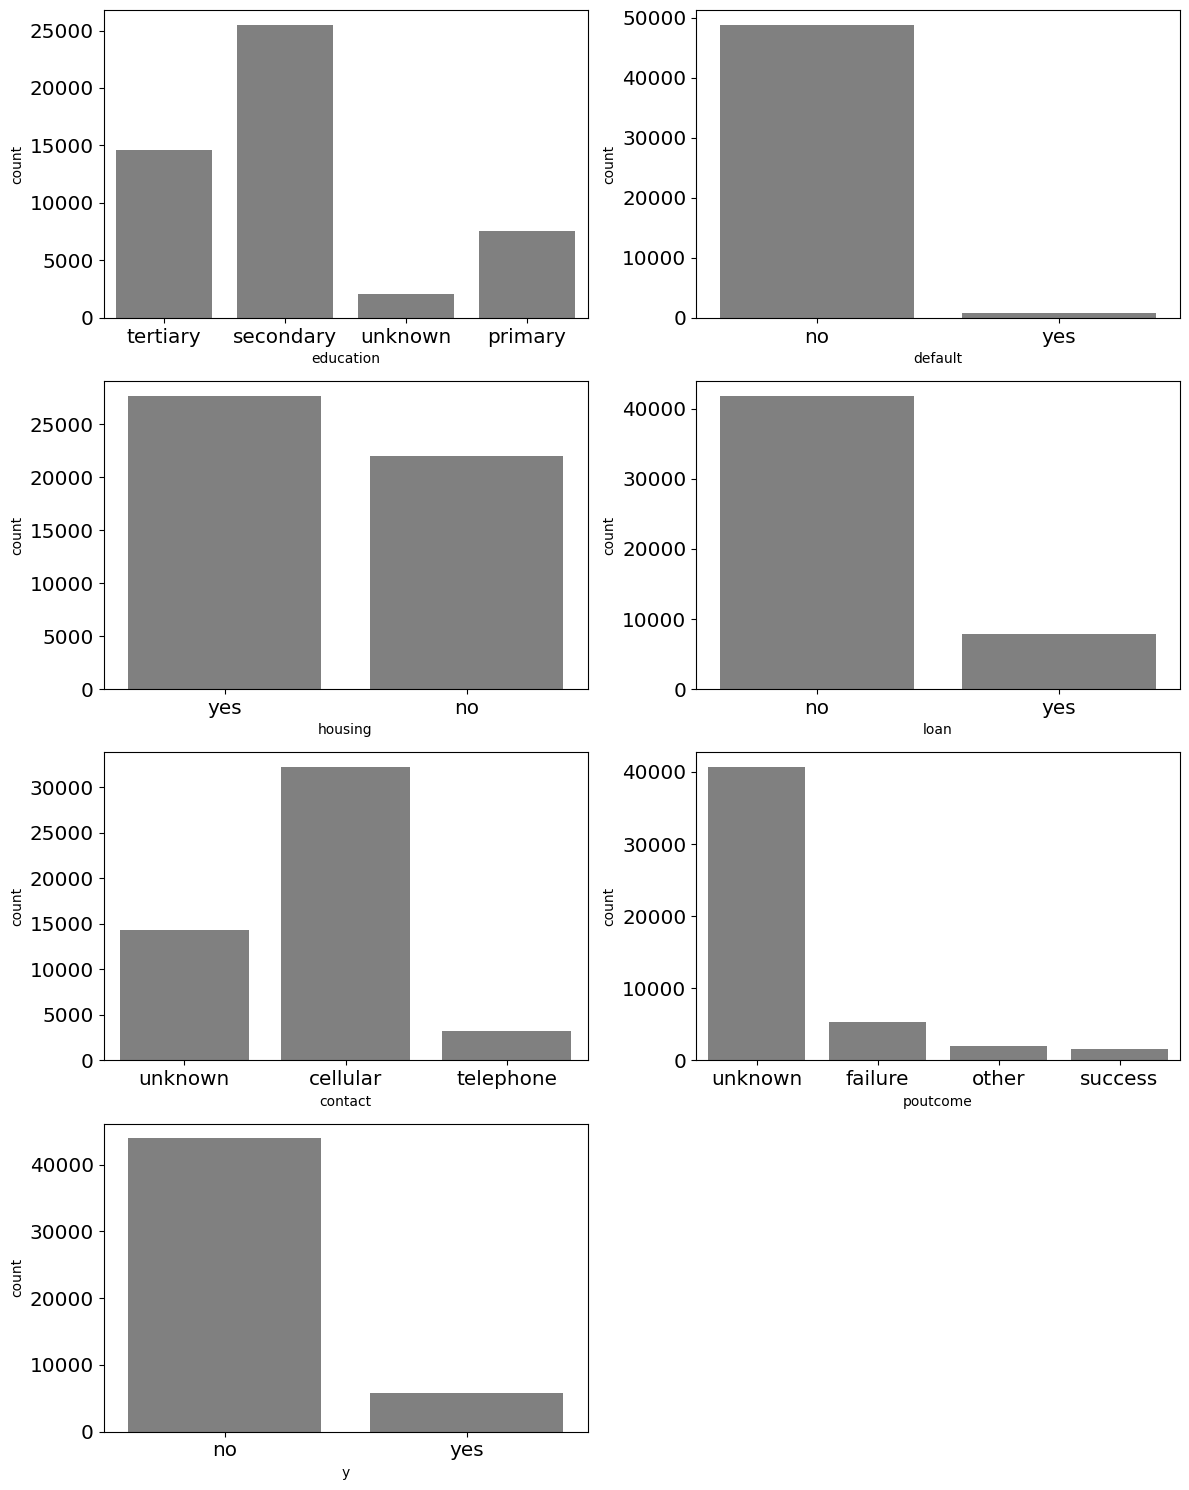

In [29]:
plt.figure(figsize=(12, 15))
num_columns = 2

for i in range(0, len(cats[2:])):
    plt.subplot(4, num_columns, i+1)
    sns.countplot(x=data[cats[2:][i]], color='gray', orient='h')
    plt.tight_layout()

### - Outlier Checking (timestamp)

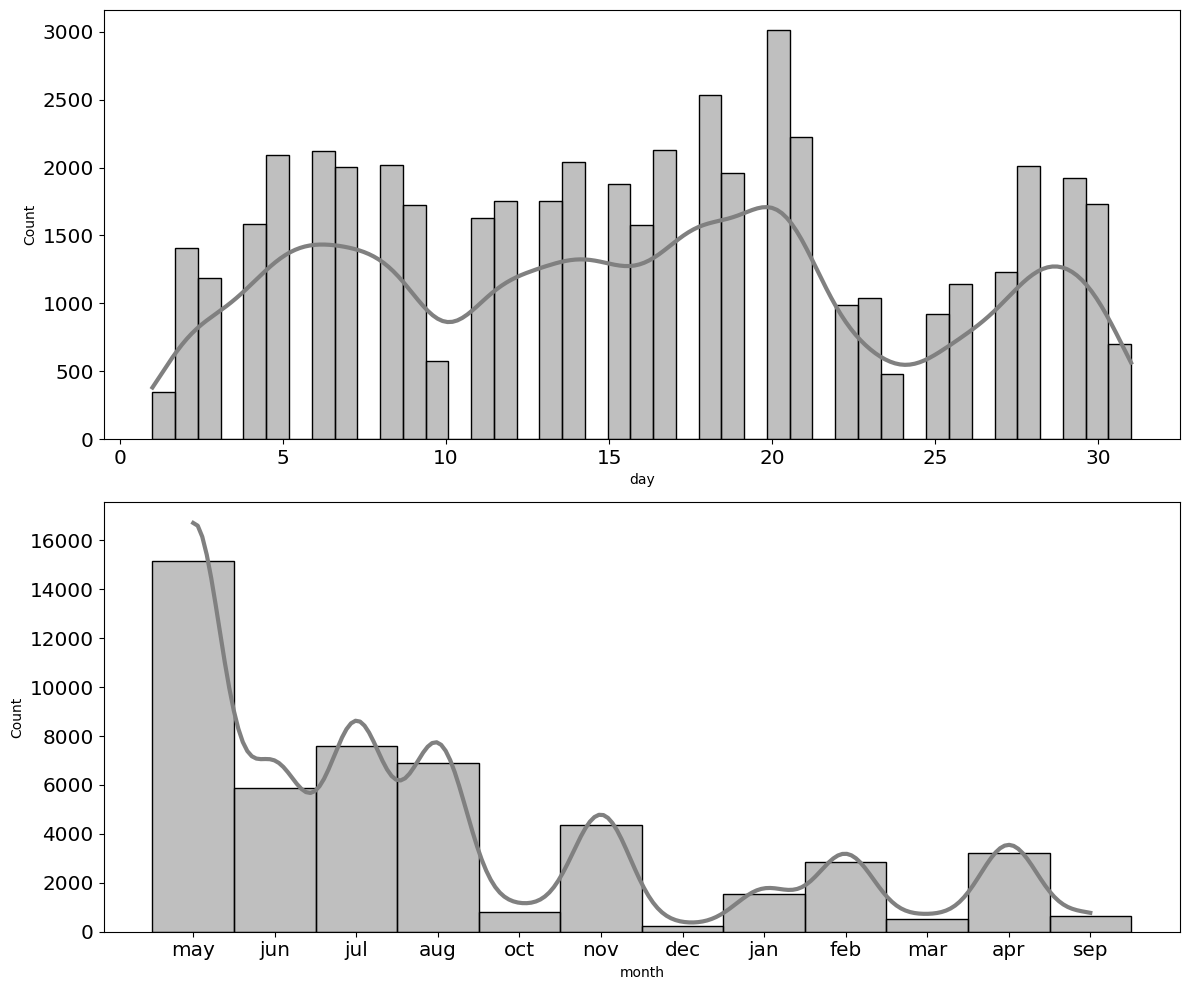

In [30]:
plt.figure(figsize=(12, 10))
num_columns = 1
for i in range(0, len(timestamp)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[timestamp[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

### - Handling Outlier with IQR

In [31]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
for col in ['age','balance','duration','campaign']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] >= low_limit) & (data[col] <= high_limit)) & filtered_entries

data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 49732
Jumlah baris setelah memfilter outlier: 38140


### - After Cleansing IQR

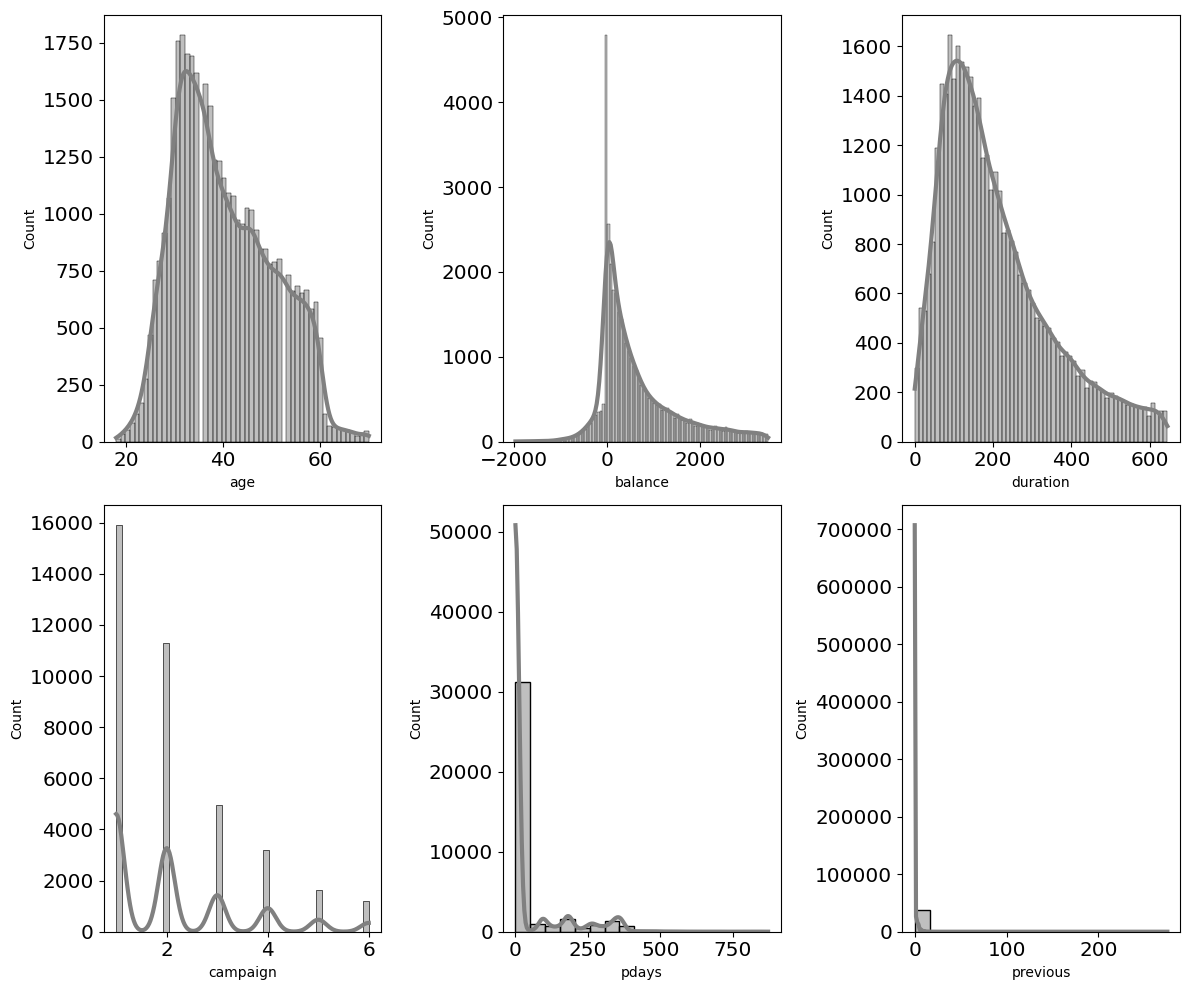

In [32]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

### - Handling Outlier with Z - Score

In [33]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

z_score_threshold = 2

filtered_entries = np.array([True] * len(data))
for col in ['pdays', 'previous']:
    mean_col = data[col].mean()
    std_col = data[col].std()
    z_scores = (data[col] - mean_col) / std_col
    
    # Menyaring entri berdasarkan threshold Z-score
    filtered_entries = (np.abs(z_scores) <= z_score_threshold) & filtered_entries

# Menyaring data
data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 38140
Jumlah baris setelah memfilter outlier: 34382


### - Distribusi hasil IQR + Z - Score 

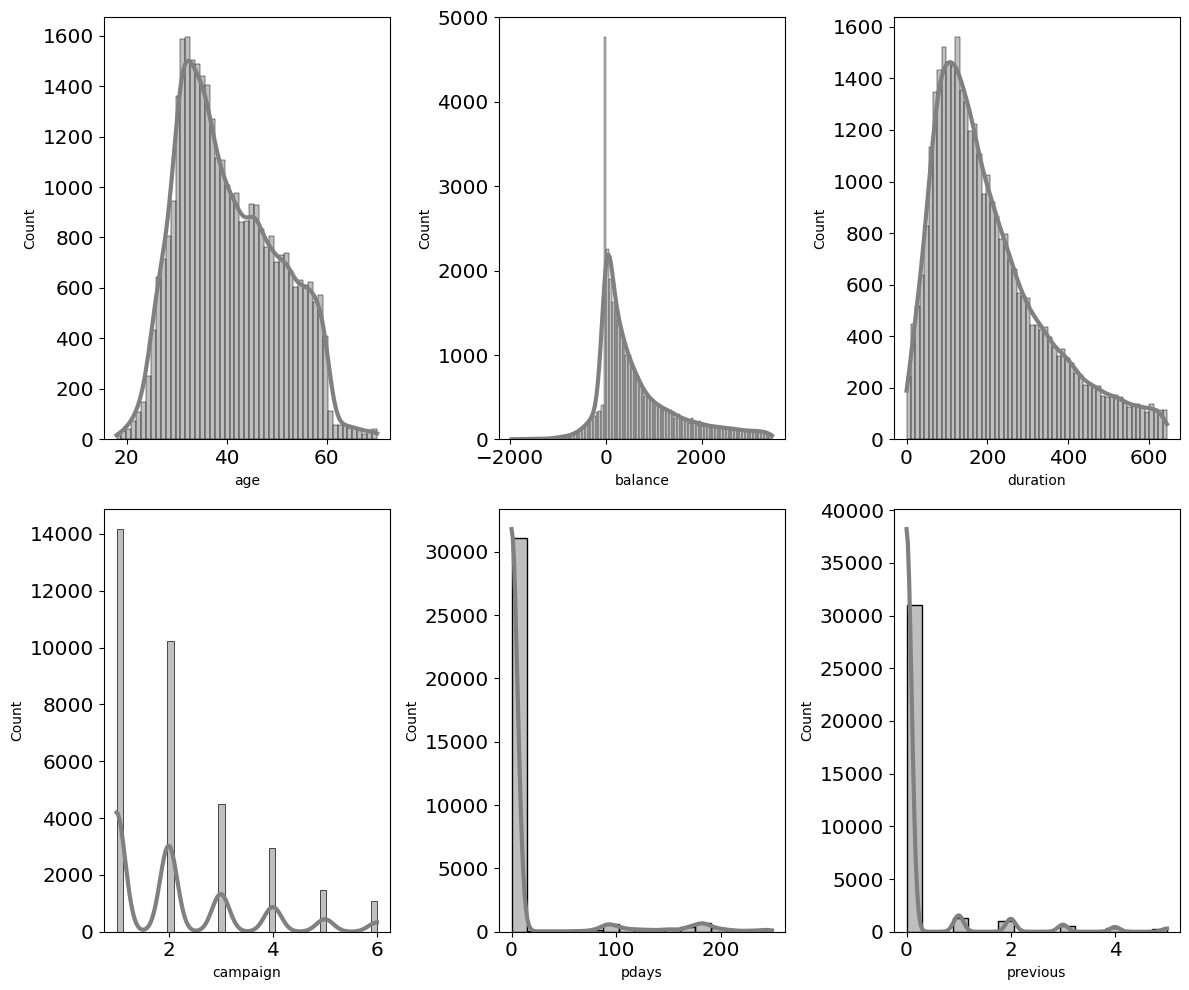

In [34]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

## d. Feature Transformation

### Minmax Scaler

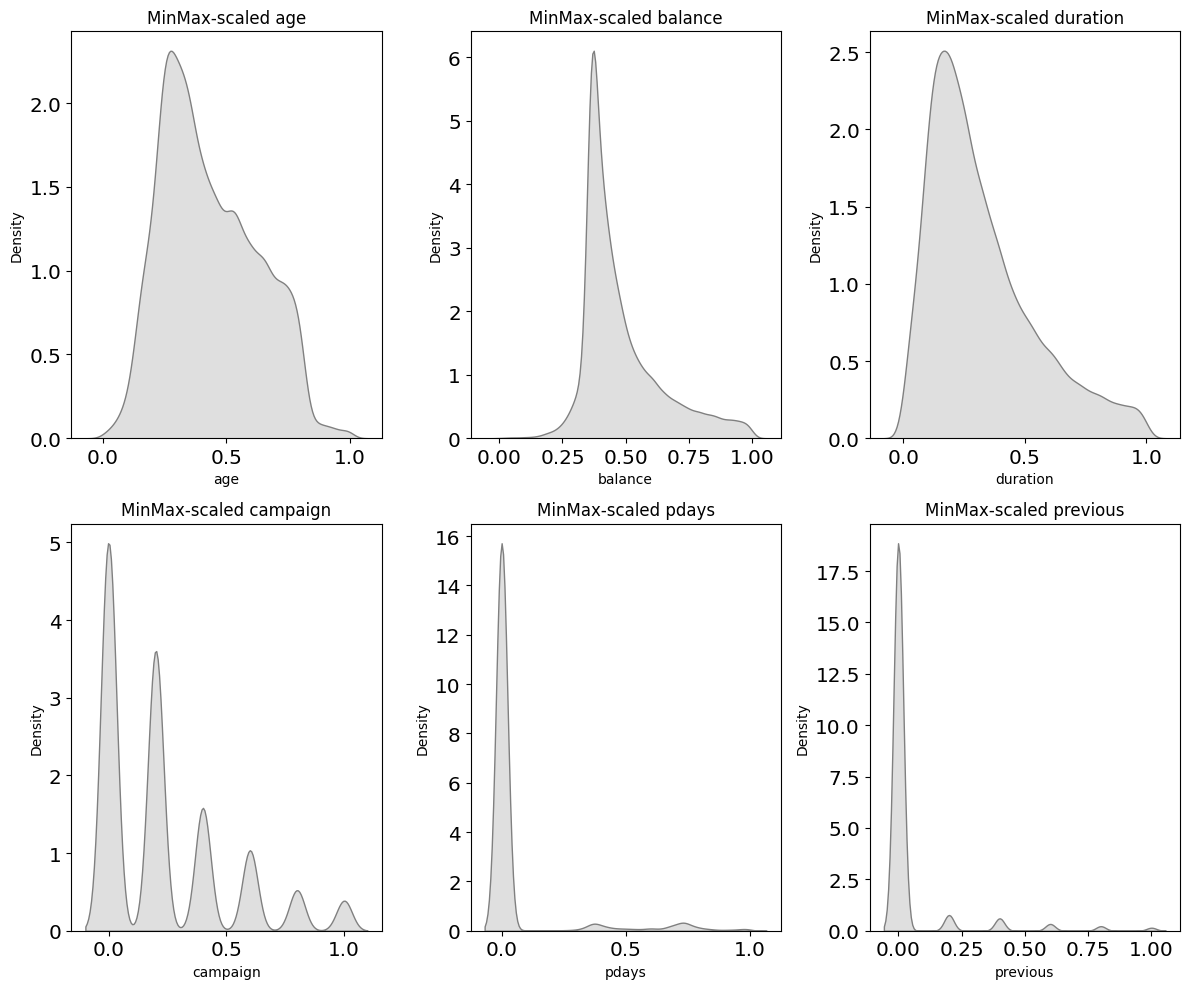

In [35]:
scaler = MinMaxScaler()

# Scaling
for col in nums:
    data[col] = scaler.fit_transform(data[[col]])

# Plotting
plt.figure(figsize=(12, 10))
num_columns = 3  # Menentukan jumlah kolom per baris

for i in range(len(nums)):
    plt.subplot(2, num_columns, i + 1)  # Mengatur 2 baris
    sns.kdeplot(data=data[nums[i]], color='gray', fill=True)
    plt.title(f'MinMax-scaled {nums[i]}')
    plt.tight_layout()


In [36]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,tahun_lahir
count,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000
mean,0.431018,0.478270,15.748502,0.321009,0.229219,0.056654,0.043819,1983.587080
std,0.191906,0.155629,8.389212,0.216905,0.265423,0.185226,0.153736,9.979125
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1954.000000
25%,0.269231,0.369157,8.000000,0.158140,0.000000,0.000000,0.000000,1976.000000
50%,0.403846,0.423997,16.000000,0.263566,0.200000,0.000000,0.000000,1985.000000
75%,0.576923,0.540072,22.000000,0.434109,0.400000,0.000000,0.000000,1992.000000
max,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,2006.000000


### - Drop Column (After Feature Transformation)

In [37]:
## Drop dibawah Optional, silahkan buka bila ingin di drop
# data.drop(data[nums], axis=1, inplace=True)

### - Corelation Heatmap (After Feature Transformation)

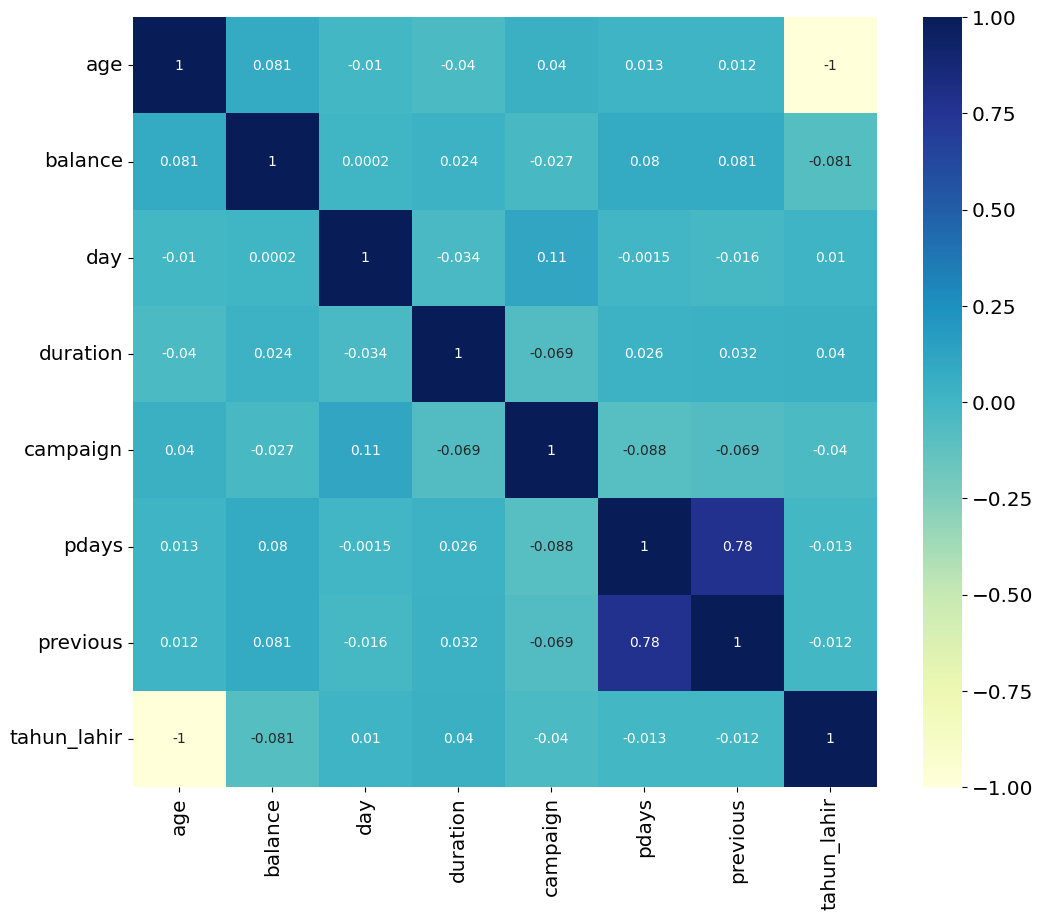

In [38]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

## e. Feature Encoding

### - Label Encoding

In [39]:
# jenis_kelamin & pendidikan
mapping_education = {
    'unknown' : 0,
    'primary' : 1,
    'secondary' : 2,
    'tertiary' : 3
}

mapping_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

## Hasil Revisi, bila ada perubahan silahkan buka komen

mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1
}

mapping_loan = {
    'no' : 0,
    'yes' : 1
}

mapping_y = {
    'no' : 0,
    'yes' : 1
}

In [40]:
data['education'] = data['education'].map(mapping_education)
data['month'] = data['month'].map(mapping_month)

## Hasil Revisi, bila ada perubahan silahkan buka komen

data['default'] = data['default'].map(mapping_default)
data['housing'] = data['housing'].map(mapping_housing)
data['loan'] = data['loan'].map(mapping_loan)
data['y'] = data['y'].map(mapping_y)

### - One Hot Encoding

In [41]:
data = pd.get_dummies(data, columns=['job', 'marital', 'contact', 'default', 'housing',
                                     'loan','poutcome'])

In [42]:
data.sample(10)

,age,education,balance,day,month,duration,campaign,pdays,previous,y,kategori_usia,kategori_pendapatan,tahun_lahir,generasi,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
32002,0.653846,2,0.461538,13,4,0.327132,0.2,0.000000,0.0,0,usia produktif,SES - C,1972,Gen X,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
12670,0.365385,1,0.431542,4,7,0.849612,0.2,0.000000,0.0,0,usia produktif,SES - C,1987,Millennials (Gen Y),0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1
43114,0.326923,3,0.499080,23,2,0.218605,0.2,0.706827,0.6,0,usia produktif,SES - B,1989,Millennials (Gen Y),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0
19658,0.634615,2,0.361612,7,8,0.203101,0.6,0.000000,0.0,0,usia produktif,Saldo Negatif,1973,Gen X,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
7294,0.346154,2,0.538093,29,5,0.310078,0.6,0.000000,0.0,0,usia produktif,SES - B,1988,Millennials (Gen Y),0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1
15792,0.211538,2,0.352595,21,7,0.325581,0.0,0.000000,0.0,0,usia produktif,Saldo Negatif,1995,Millennials (Gen Y),0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1
17394,0.711538,3,0.387560,28,7,0.238760,0.8,0.000000,0.0,0,usia produktif,SES - D,1969,Gen X,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
13115,0.153846,2,0.345050,8,7,0.372093,0.0,0.000000,0.0,0,usia produktif,Saldo Negatif,1998,Gen Z,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1
13151,0.461538,3,0.449577,8,7,0.255814,0.0,0.000000,0.0,0,usia produktif,SES - C,1982,Millennials (Gen Y),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1
25426,0.442308,2,0.426389,18,11,0.200000,0.2,0.000000,0.0,0,usia produktif,SES - C,1983,Millennials (Gen Y),0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1


# Business Insight (Before Modeling)

In [43]:
data_yes = data[data['y'] == 1]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34382 entries, 0 to 49730
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  34382 non-null  float64
 1   education            34382 non-null  int64  
 2   balance              34382 non-null  float64
 3   day                  34382 non-null  int64  
 4   month                34382 non-null  int64  
 5   duration             34382 non-null  float64
 6   campaign             34382 non-null  float64
 7   pdays                34382 non-null  float64
 8   previous             34382 non-null  float64
 9   y                    34382 non-null  int64  
 10  kategori_usia        34382 non-null  object 
 11  kategori_pendapatan  34382 non-null  object 
 12  tahun_lahir          34382 non-null  int64  
 13  generasi             34382 non-null  object 
 14  job_admin.           34382 non-null  uint8  
 15  job_blue-collar      34382 non-null 

### - Durasi Kontak Terakhir 'duration_minutes'

In [45]:
data['duration_minutes'] = data['duration'] / 60

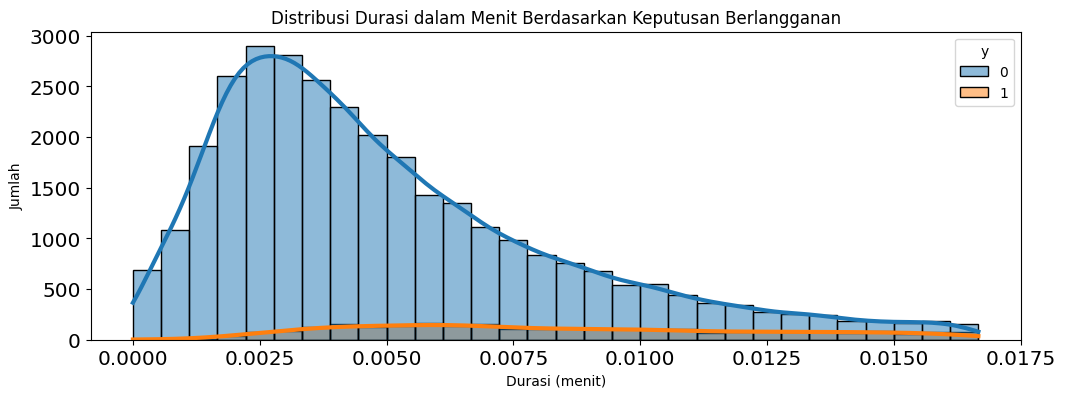

In [46]:
sns.histplot(data=data, x='duration_minutes', hue='y', kde=True, bins=30)
plt.title('Distribusi Durasi dalam Menit Berdasarkan Keputusan Berlangganan')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah')
plt.show()

### - Analisis 'kategori_usia'

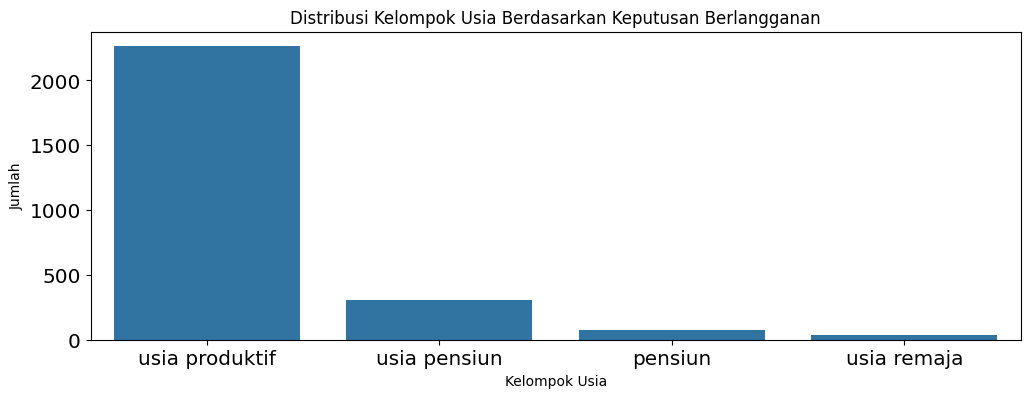

In [47]:
sns.countplot(data=data_yes, x='kategori_usia')
plt.title('Distribusi Kelompok Usia Berdasarkan Keputusan Berlangganan')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah')
plt.show()

### - Analisis 'kategori_pendapatan'

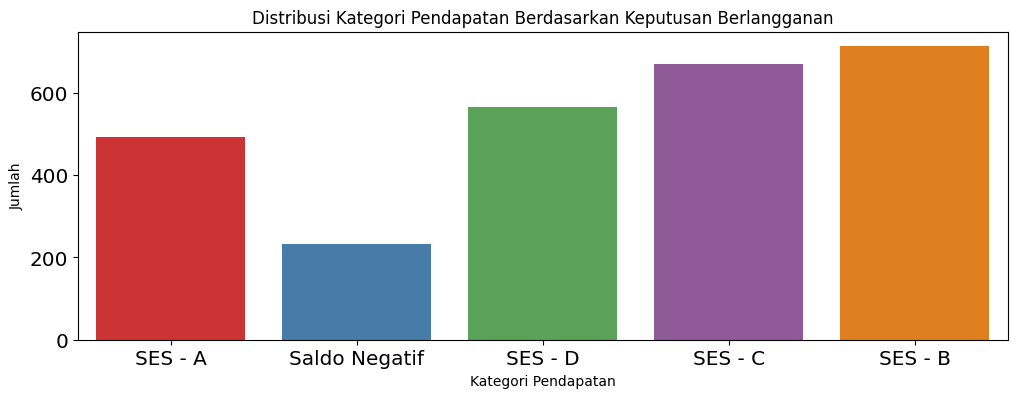

In [48]:
sns.countplot(data=data_yes, x='kategori_pendapatan', palette='Set1')
plt.title('Distribusi Kategori Pendapatan Berdasarkan Keputusan Berlangganan')
plt.xlabel('Kategori Pendapatan')
plt.ylabel('Jumlah')
plt.show()

In [49]:
data_yes['kategori_pendapatan'].value_counts()

SES - B          713
SES - C          670
SES - D          565
SES - A          492
Saldo Negatif    233
Name: kategori_pendapatan, dtype: int64

### - Analisis 'generasi'

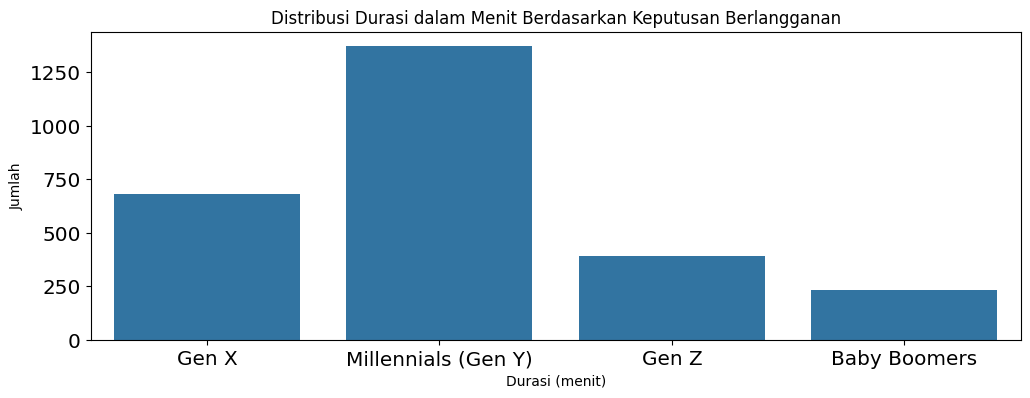

In [50]:
sns.countplot(data=data_yes, x='generasi')
plt.title('Distribusi Durasi dalam Menit Berdasarkan Keputusan Berlangganan')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah')
plt.show()

In [51]:
data_yes['generasi'].value_counts()

Millennials (Gen Y)    1371
Gen X                   679
Gen Z                   391
Baby Boomers            232
Name: generasi, dtype: int64

# MODELING

## - Split Data Train & Test

In [52]:
data_update = data.copy()

In [53]:
data_update.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,tahun_lahir,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,duration_minutes
count,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.00000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.00000,34382.00000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000
mean,0.431018,2.060497,0.478270,15.748502,6.146588,0.321009,0.229219,0.056654,0.043819,0.077744,1983.587080,0.116514,0.216363,0.034320,0.02830,0.204031,0.041795,0.035455,0.094701,0.021348,0.171311,0.029550,0.006311,0.117329,0.601012,0.281659,0.619365,0.053982,0.326653,0.979524,0.020476,0.45265,0.54735,0.827613,0.172387,0.054273,0.018789,0.025711,0.901227,0.005350
std,0.191906,0.767838,0.155629,8.389212,2.371341,0.216905,0.265423,0.185226,0.153736,0.267772,9.979125,0.320845,0.411771,0.182053,0.16583,0.402998,0.200124,0.184929,0.292805,0.144545,0.376786,0.169346,0.079195,0.321816,0.489697,0.449815,0.485550,0.225985,0.468996,0.141623,0.141623,0.49776,0.49776,0.377722,0.377722,0.226558,0.135781,0.158274,0.298361,0.003615
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269231,2.000000,0.369157,8.000000,5.000000,0.158140,0.000000,0.000000,0.000000,0.000000,1976.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.002636
50%,0.403846,2.000000,0.423997,16.000000,6.000000,0.263566,0.200000,0.000000,0.000000,0.000000,1985.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.004393
75%,0.576923,3.000000,0.540072,22.000000,8.000000,0.434109,0.400000,0.000000,0.000000,0.000000,1992.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.007235
max,1.000000,3.000000,1.000000,31.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2006.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.016667


In [54]:
# data_update = data_update.drop(columns=['age','balance','duration','campaign',
#                                         'pdays','previous','kategori_usia','kategori_pendapatan',
#                                         'duration_minutes','generasi',
#                                         'education','day','month','tahun_lahir'])

In [55]:
data_update = data_update.drop(columns=['kategori_usia','kategori_pendapatan',
                                        'duration_minutes','generasi','duration'])

In [56]:
data_update.describe()

,age,education,balance,day,month,campaign,pdays,previous,y,tahun_lahir,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.00000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.00000,34382.00000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000
mean,0.431018,2.060497,0.478270,15.748502,6.146588,0.229219,0.056654,0.043819,0.077744,1983.587080,0.116514,0.216363,0.034320,0.02830,0.204031,0.041795,0.035455,0.094701,0.021348,0.171311,0.029550,0.006311,0.117329,0.601012,0.281659,0.619365,0.053982,0.326653,0.979524,0.020476,0.45265,0.54735,0.827613,0.172387,0.054273,0.018789,0.025711,0.901227
std,0.191906,0.767838,0.155629,8.389212,2.371341,0.265423,0.185226,0.153736,0.267772,9.979125,0.320845,0.411771,0.182053,0.16583,0.402998,0.200124,0.184929,0.292805,0.144545,0.376786,0.169346,0.079195,0.321816,0.489697,0.449815,0.485550,0.225985,0.468996,0.141623,0.141623,0.49776,0.49776,0.377722,0.377722,0.226558,0.135781,0.158274,0.298361
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269231,2.000000,0.369157,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1976.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.403846,2.000000,0.423997,16.000000,6.000000,0.200000,0.000000,0.000000,0.000000,1985.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.576923,3.000000,0.540072,22.000000,8.000000,0.400000,0.000000,0.000000,0.000000,1992.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,31.000000,12.000000,1.000000,1.000000,1.000000,1.000000,2006.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Catatan : RandomOverSampler tidak suport kepada one hot encoding

# Pisahkan fitur dan target
X = data_update.drop(columns='y')
y = data_update['y']

# Pembagian data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### - Oversampling

In [58]:
# Oversampling (Yang akan digunakan)
ros = RandomOverSampler(random_state=42)

# Variable [Oversampling] yang ditampung
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
print('Random Oversampling:')
print('Sebelum oversampling:')
print(y_train.value_counts())
print('Setelah oversampling:')
print(y_train_over.value_counts())

Random Oversampling:
Sebelum oversampling:
0    25367
1     2138
Name: y, dtype: int64
Setelah oversampling:
0    25367
1    25367
Name: y, dtype: int64


### - Undersampling

In [59]:
# Undersampling
rus = RandomUnderSampler(random_state=42)

# Variable [Undesampling] yang ditampung
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print('Random Undersampling:')
print('Sebelum undersampling:')
print(y_train.value_counts())
print('Setelah undersampling:')
print(y_train_under.value_counts())

Random Undersampling:
Sebelum undersampling:
0    25367
1     2138
Name: y, dtype: int64
Setelah undersampling:
0    2138
1    2138
Name: y, dtype: int64


In [60]:
X_train_over

,age,education,balance,day,month,campaign,pdays,previous,tahun_lahir,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519231,2,0.377806,22,8,0.4,0.000000,0.0,1979,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1
1,0.711538,2,0.413692,14,5,0.2,0.000000,0.0,1969,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1
2,0.269231,3,0.478653,28,8,0.0,0.465863,0.8,1992,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0
3,0.307692,2,0.361612,10,7,0.0,0.000000,0.0,1990,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1
4,0.346154,2,0.497792,30,5,0.2,0.000000,0.0,1988,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50729,0.384615,3,0.582260,4,8,0.0,0.004016,0.2,1986,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0
50730,0.384615,2,0.815605,2,6,0.0,0.000000,0.0,1986,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
50731,0.653846,2,0.802908,3,11,0.0,0.000000,0.0,1972,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1
50732,0.384615,2,0.399338,26,5,0.0,0.000000,0.0,1986,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1


### - SMOTE

In [82]:
# SMOTE
smote = SMOTE(random_state=42)

# Variable [SMOTE] yang ditampung
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)
print('SMOTE:')
print('Sebelum SMOTE:')
print(y_train.value_counts())
print('Setelah SMOTE:')
print(y_train_SMOTE.value_counts())

SMOTE:
Sebelum SMOTE:
0    25367
1     2138
Name: y, dtype: int64
Setelah SMOTE:
0    25367
1    25367
Name: y, dtype: int64


### - Handling Class imbalance Dokumentasi

In [62]:
# Pangil variabel ini untuk (Over Samplong)
X_train_over, y_train_over

# Pangil variabel ini untuk (Under Samplong)
X_train_under, y_train_under

# # Pangil variabel ini untuk (Over SMOTE)
# X_train_SMOTE, y_train_SMOTE

(            age  education   balance  day  month  campaign     pdays  \
 19266  0.365385          2  0.704453    6      8       0.2  0.000000   
 33255  0.326923          2  0.406331   20      4       0.4  0.000000   
 8852   0.211538          3  0.162311    4      6       0.2  0.000000   
 24215  0.288462          2  0.398417   17     11       0.0  0.000000   
 39960  0.173077          3  0.398417    3      6       0.0  0.000000   
 ...         ...        ...       ...  ...    ...       ...       ...   
 31196  0.288462          3  0.662679   27      2       0.0  0.000000   
 41227  0.903846          2  0.789658   21      8       0.0  0.000000   
 44411  0.788462          2  0.660655    4      8       0.0  0.722892   
 41742  0.288462          3  0.689363    8     10       0.2  0.734940   
 42051  0.519231          2  0.361612   29     10       0.0  0.000000   
 
        previous  tahun_lahir  job_admin.  job_blue-collar  job_entrepreneur  \
 19266       0.0         1987           0 

## FUNCTION

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

### 01.Fungsi (eval_classification)

In [64]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_train, y_pred_train))

    # print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    # print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    
    # score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    # print('recall (crossval train): '+ str(score['train_score'].mean()))
    # print('recall (crossval test): '+ str(score['test_score'].mean()))

### 02.Fungsi (show_feature_importance)

In [65]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### 03.Fungsi (show_best_hyperparameter)

In [66]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### 04.Fungsi (print_confusion_matrix)

In [67]:
#Fungsi untuk menampilkan confusion matrix
def print_confusion_matrix(model):

    # Melakukan prediksi pada dataset uji
    y_pred = model.predict(X_test)
    
    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # # Menampilkan confusion matrix dalam bentuk angka
    # print("Confusion Matrix:")
    # print(cm)
    
    # Visualisasi confusion matrix menggunakan Matplotlib
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for Logistic Regression')
    plt.show()

### 05.Fungsi (draw_learning_curve)

In [68]:
def draw_learning_curve_lr(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]


In [69]:
def draw_learning_curve_knn(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]


In [70]:
def draw_learning_curve_dt(param_values_dt):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Decision Tree')
    plt.legend()
    plt.show()

In [71]:
data['y'].value_counts(normalize=True)

0    0.922256
1    0.077744
Name: y, dtype: float64

In [72]:
data['y'].value_counts()

0    31709
1     2673
Name: y, dtype: int64

## Training Model

In [73]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


### 01.Logistic Regresion

#### - Normal Logistic Regresion

In [83]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.93
Precision (Test Set): 0.65
Precision (Train Set): 0.67
Recall (Test Set): 0.13
Recall (Train Set): 0.15
F1-Score (Test Set): 0.22
F1-Score (Test Set): 0.24


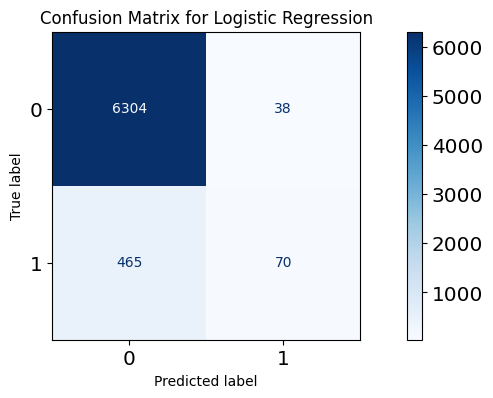

In [84]:
print_confusion_matrix(logreg)

param value: 1; train: 0.7967858405492312; test: 0.8097254028181798
param value: 2; train: 0.8057555128137095; test: 0.8196759770938146
param value: 3; train: 0.8033707088269737; test: 0.8163868233435604
param value: 4; train: 0.8031869517503627; test: 0.8185545407121195
param value: 5; train: 0.7970473707895135; test: 0.8099040074035432
param value: 6; train: 0.7980422698804008; test: 0.8113632009714203
param value: 7; train: 0.7974475024691781; test: 0.8105241130926594
param value: 8; train: 0.7972378947582694; test: 0.8100985272489883
param value: 9; train: 0.7972746424859121; test: 0.8101179792335329
param value: 10; train: 0.7971077012284731; test: 0.8099614791760611
param value: 11; train: 0.7971185798834199; test: 0.8099712051683334
param value: 12; train: 0.7977482696208619; test: 0.8109859503620722
param value: 13; train: 0.8010297329127953; test: 0.8164407583916157
param value: 14; train: 0.7977135685554213; test: 0.8107286536574152
param value: 15; train: 0.7968466688249426;

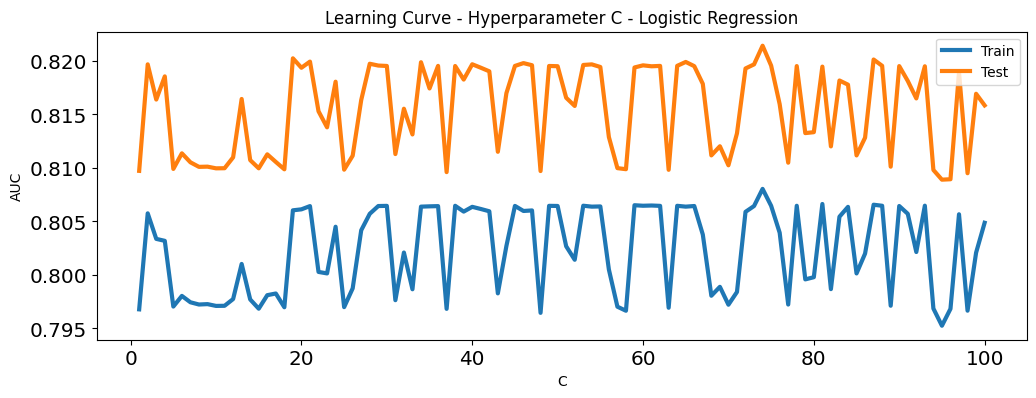

In [85]:
draw_learning_curve_lr(param_values)

#### - Oversampling Logistic Regresion

In [86]:
logreg_over = LogisticRegression()
logreg_over.fit(X_train_over, y_train_over)
eval_classification(logreg_over)

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.71
Precision (Test Set): 0.19
Precision (Train Set): 0.18
Recall (Test Set): 0.79
Recall (Train Set): 0.75
F1-Score (Test Set): 0.30
F1-Score (Test Set): 0.29


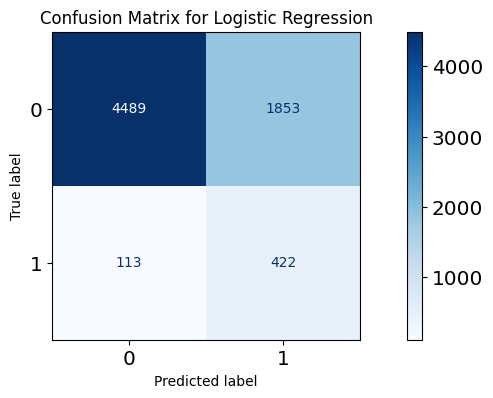

In [87]:
print_confusion_matrix(logreg_over)

In [88]:
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

rs_over = RandomizedSearchCV(logreg_over, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs_over.fit(X_train_over, y_train_over)
eval_classification(rs_over)

Accuracy (Test Set): 0.72
Accuracy (Train Set): 0.71
Precision (Test Set): 0.18
Precision (Train Set): 0.17
Recall (Test Set): 0.77
Recall (Train Set): 0.72
F1-Score (Test Set): 0.30
F1-Score (Test Set): 0.28


#### - Undersampling Logistic Regresion

In [89]:
logreg_under = LogisticRegression()
logreg_under.fit(X_train_under, y_train_under)
eval_classification(logreg_under)

Accuracy (Test Set): 0.70
Accuracy (Train Set): 0.69
Precision (Test Set): 0.17
Precision (Train Set): 0.17
Recall (Test Set): 0.78
Recall (Train Set): 0.74
F1-Score (Test Set): 0.29
F1-Score (Test Set): 0.27


#### - SMOTE Logistic Regresion

In [90]:
logreg_SMOTE = LogisticRegression()
logreg_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
eval_classification(logreg_SMOTE)

Accuracy (Test Set): 0.89
Accuracy (Train Set): 0.88
Precision (Test Set): 0.32
Precision (Train Set): 0.31
Recall (Test Set): 0.42
Recall (Train Set): 0.39
F1-Score (Test Set): 0.37
F1-Score (Test Set): 0.34


### 02.Decision Tree

#### Normal Decision Tree

In [91]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
eval_classification(tree)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 1.00
Precision (Test Set): 0.41
Precision (Train Set): 1.00
Recall (Test Set): 0.45
Recall (Train Set): 1.00
F1-Score (Test Set): 0.43
F1-Score (Test Set): 1.00


#### Oversampling Decision Tree

In [93]:
tree_over = DecisionTreeClassifier()
tree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [94]:
eval_classification(tree_over)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 1.00
Precision (Test Set): 0.42
Precision (Train Set): 1.00
Recall (Test Set): 0.46
Recall (Train Set): 1.00
F1-Score (Test Set): 0.44
F1-Score (Test Set): 1.00


#### SMOTE Decision Tree

In [95]:
tree_SMOTE = DecisionTreeClassifier()
tree_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

In [96]:
eval_classification(tree_SMOTE)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.40
Precision (Train Set): 1.00
Recall (Test Set): 0.48
Recall (Train Set): 1.00
F1-Score (Test Set): 0.43
F1-Score (Test Set): 1.00


### 03.Random Forest

In [97]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
eval_classification(forest)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.72
Precision (Train Set): 1.00
Recall (Test Set): 0.37
Recall (Train Set): 1.00
F1-Score (Test Set): 0.49
F1-Score (Test Set): 1.00


### 04.K Nearest Neighbor

#### Normal KNN

In [99]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [100]:
eval_classification(knn)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.94
Precision (Test Set): 0.48
Precision (Train Set): 0.72
Recall (Test Set): 0.18
Recall (Train Set): 0.30
F1-Score (Test Set): 0.26
F1-Score (Test Set): 0.42


param value: 1; train: 1.0; test: 0.684399655758819
param value: 2; train: 0.9864269511411581; test: 0.7181248286899088
param value: 3; train: 0.9742617293012293; test: 0.7384885513281874
param value: 4; train: 0.9658504823650919; test: 0.7525459995225421
param value: 5; train: 0.958817929778688; test: 0.7668779859533092
param value: 6; train: 0.9519977322245268; test: 0.7757895000545244
param value: 7; train: 0.9465403351208378; test: 0.7843429208038974
param value: 8; train: 0.9419526403841558; test: 0.7869827908882188
param value: 9; train: 0.9380854813729217; test: 0.7944460163219833
param value: 10; train: 0.9341956984470774; test: 0.7943603981172837
param value: 11; train: 0.9303599400280035; test: 0.8001660786862248
param value: 12; train: 0.9269281945714184; test: 0.8026572589795962
param value: 13; train: 0.9238329959782535; test: 0.8021973374359336
param value: 14; train: 0.9204492641106203; test: 0.8032785435768662
param value: 15; train: 0.9179378620817402; test: 0.80657801

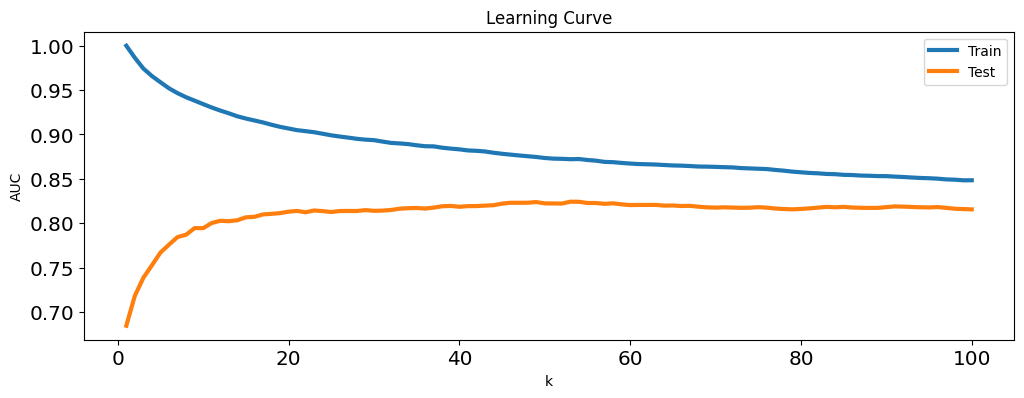

In [101]:
draw_learning_curve_knn(param_values)

#### Oversampling KNN

In [102]:
knn_over = KNeighborsClassifier()
knn_over.fit(X_train_over,y_train_over)

KNeighborsClassifier()

In [103]:
eval_classification(knn_over)

Accuracy (Test Set): 0.86
Accuracy (Train Set): 0.93
Precision (Test Set): 0.30
Precision (Train Set): 0.52
Recall (Test Set): 0.57
Recall (Train Set): 1.00
F1-Score (Test Set): 0.40
F1-Score (Test Set): 0.68


#### SMOTE KNN

In [104]:
knn_SMOTE = KNeighborsClassifier()
knn_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

KNeighborsClassifier()

In [105]:
eval_classification(knn_SMOTE)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.91
Precision (Test Set): 0.27
Precision (Train Set): 0.45
Recall (Test Set): 0.63
Recall (Train Set): 0.96
F1-Score (Test Set): 0.38
F1-Score (Test Set): 0.62


### 05.LightGBM

In [106]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

#### Normal LGBM

In [107]:
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 2138, number of negative: 25367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 27505, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077731 -> initscore=-2.473578
[LightGBM] [Info] Start training from score -2.473578


LGBMClassifier()

In [108]:
eval_classification(LGBM)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.95
Precision (Test Set): 0.63
Precision (Train Set): 0.85
Recall (Test Set): 0.30
Recall (Train Set): 0.44
F1-Score (Test Set): 0.41
F1-Score (Test Set): 0.58


#### Oversampling LGBM

In [109]:
LGBM_over = lgb.LGBMClassifier()
LGBM_over.fit(X_train_over,y_train_over)

[LightGBM] [Info] Number of positive: 25367, number of negative: 25367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 50734, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [110]:
eval_classification(LGBM_over)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.90
Precision (Test Set): 0.35
Precision (Train Set): 0.42
Recall (Test Set): 0.75
Recall (Train Set): 0.86
F1-Score (Test Set): 0.48
F1-Score (Test Set): 0.56


## Evaluate Model (Summary) | YANG DIGUNAKAN

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = [logreg, tree, forest, knn]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K - Nearest Neighbor']

In [112]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# models = [logreg, tree, forest, knn]
# model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K - Nearest Neighbor']

# for model, name in zip(models, model_names):
#     y_pred = model.predict(X_test)
#     y_pred_train = model.predict(X_train)
    
#     print("-----------------------------------------------------------------------")
#     print("--------------------------", name,"--------------------------")
#     print("-----------------------------------------------------------------------")

#     print(f"Accuracy (Test Set): {accuracy_score(y_test, y_pred):.2f}")
#     print(f"Accuracy (Train Set): {accuracy_score(y_train, y_pred_train):.2f}")
#     print(f"Precision (Test Set): {precision_score(y_test, y_pred, pos_label=1):.2f}")
#     print(f"Recall (Test Set): {recall_score(y_test, y_pred, pos_label=1):.2f}")
#     print(f"F1 Score (Test Set): {f1_score(y_test, y_pred, pos_label=1):.2f}")
    
#     # if predict_proba jika tersedia
#     if hasattr(model, "predict_proba"):
#         y_pred_proba = model.predict_proba(X_test)
#         y_pred_proba_train = model.predict_proba(X_train)
#         print(f"AUC-ROC (Test Set): {roc_auc_score(y_test, y_pred_proba[:, 1]):.2f}")
#         print(f"AUC-ROC (Train Set): {roc_auc_score(y_train, y_pred_proba_train[:, 1]):.2f}")
#     else:
#         print(f"{name} does not support probability estimates and AUC-ROC calculation.")

#     # Cross Validate
#     score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
#     print('Recall (Cross-Validation Train Set): {:.2f}'.format(score['train_score'].mean()))
#     print('Recall (Cross-Validation Test Set): {:.2f}'.format(score['test_score'].mean()))

## Cross Validation

In [113]:
# from sklearn.model_selection import cross_val_score

# # Menggunakan cross-validation dengan 5 fold
# for model, name in zip(models, model_names):
#     scores = cross_val_score(model, X, y, cv=5, scoring='f1')
#     print(f"{name} Cross-Validation F1 Score: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


## Hyperparameter Tuning

In [114]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### 01.Tuning - Logistic Regresion

In [115]:
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
logreg_tuning = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
logreg_tuning.fit(X_train_over, y_train_over)
eval_classification(logreg_tuning)

Accuracy (Test Set): 0.72
Accuracy (Train Set): 0.71
Precision (Test Set): 0.18
Precision (Train Set): 0.17
Recall (Test Set): 0.77
Recall (Train Set): 0.72
F1-Score (Test Set): 0.30
F1-Score (Test Set): 0.28


### 02.Tuning - Decision Tree

In [116]:
# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
tree = DecisionTreeClassifier(random_state=42)
tree_tuning = GridSearchCV(tree, hyperparameters, cv=5, scoring='precision')
tree_tuning.fit(X_train, y_train)

# Predict & Evaluation
y_pred = tree_tuning.predict(X_test)#Check performa dari model
eval_classification(tree_tuning)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 0.93
Precision (Test Set): 0.66
Precision (Train Set): 0.72
Recall (Test Set): 0.15
Recall (Train Set): 0.16
F1-Score (Test Set): 0.24
F1-Score (Test Set): 0.26


### 03.Tuning - KNN

In [117]:
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

In [118]:

knn.fit(X_train, y_train)
knn_tuning = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
knn_tuning.fit(X_train, y_train)
eval_classification(knn_tuning)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.93
Precision (Test Set): 0.60
Precision (Train Set): 0.70
Recall (Test Set): 0.06
Recall (Train Set): 0.06
F1-Score (Test Set): 0.10
F1-Score (Test Set): 0.11


### 04.Tuning - LGBM

#### Hyper Parameter

In [119]:
lgb_params = {
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.4,
    'max_depth': -1,
    'min_child_samples': 86,
    'min_child_weight': 0.001,
    'min_split_gain': 0.5,
    'n_estimators': 160,
    'n_jobs': -1,
    'num_leaves': 90,
    'objective': 'binary',
    'random_state': 7391,
    'reg_alpha': 0.001,
    'reg_lambda': 1e-06,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0,
    'feature_fraction': 0.4,
    'bagging_freq': 2,
    'bagging_fraction': 0.5
}

In [120]:
lgb_params_new = {
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 0.8,  # Membatasi jumlah fitur yang dipilih dalam setiap pohon
    'importance_type': 'split',
    'learning_rate': 0.1,  # Menurunkan learning rate agar model belajar lebih perlahan
    'max_depth': 7,  # Membatasi kedalaman pohon
    'min_child_samples': 100,  # Meningkatkan untuk mengurangi overfitting
    'min_child_weight': 0.001,
    'min_split_gain': 0.5,
    'n_estimators': 200,  # Menambah jumlah estimator dengan learning rate rendah
    'n_jobs': -1,
    'num_leaves': 31,  # Mengurangi jumlah daun untuk menghindari overfitting
    'objective': 'binary',
    'random_state': 7391,
    'reg_alpha': 0.1,  # Menambah regularisasi L1
    'reg_lambda': 0.1,  # Menambah regularisasi L2
    'subsample': 0.8,  # Mengurangi sampel data untuk mengurangi overfitting
    'subsample_for_bin': 200000,
    'subsample_freq': 1,
    'feature_fraction': 0.6,  # Mengurangi jumlah fitur yang digunakan
    'bagging_freq': 5,  # Mengatur frekuensi bagging
    'bagging_fraction': 0.6  # Meningkatkan fraction untuk pengambilan sampel
}

#### LGBM TUNING

In [121]:
LGBM_tuning = lgb.LGBMClassifier(**lgb_params)
LGBM_tuning.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 2138, number of negative: 25367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Light

LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, feature_fraction=0.4,
               learning_rate=0.4, min_child_samples=86, min_split_gain=0.5,
               n_estimators=160, n_jobs=-1, num_leaves=90, objective='binary',
               random_state=7391, reg_alpha=0.001, reg_lambda=1e-06)

In [122]:
eval_classification(LGBM_tuning)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

#### LGBM TUNING OVER

#### Learning Curve LGBM

In [123]:
LGBM_over_tuning = lgb.LGBMClassifier(**lgb_params)
LGBM_over_tuning.fit(X_train_over, y_train_over)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Number of positive: 25367, number of negative: 25367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Ligh

LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, feature_fraction=0.4,
               learning_rate=0.4, min_child_samples=86, min_split_gain=0.5,
               n_estimators=160, n_jobs=-1, num_leaves=90, objective='binary',
               random_state=7391, reg_alpha=0.001, reg_lambda=1e-06)

In [124]:
eval_classification(LGBM_over_tuning)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

In [ ]:
draw_learning_curve_lgbm

In [125]:
LGBM_over_tuning_new = lgb.LGBMClassifier(**lgb_params_new)
LGBM_over_tuning_new.fit(X_train_over, y_train_over)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.8 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.8 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 25367, number of negative: 25367
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data poi

LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, colsample_bytree=0.8,
               feature_fraction=0.6, max_depth=7, min_child_samples=100,
               min_split_gain=0.5, n_estimators=200, n_jobs=-1,
               objective='binary', random_state=7391, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8, subsample_freq=1)

In [126]:
eval_classification(LGBM_over_tuning_new)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.8 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.8 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.8 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=1 

[LightGBM] [Info] Number of positive: 2138, number of negative: 25367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 27505, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077731 -> initscore=-2.473578
[LightGBM] [Info] Start training from score -2.473578
num_leaves: 10; Train AUC: 0.901171089048871; Test AUC: 0.8737670831159722
[LightGBM] [Info] Number of positive: 2138, number of negative: 25367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points 

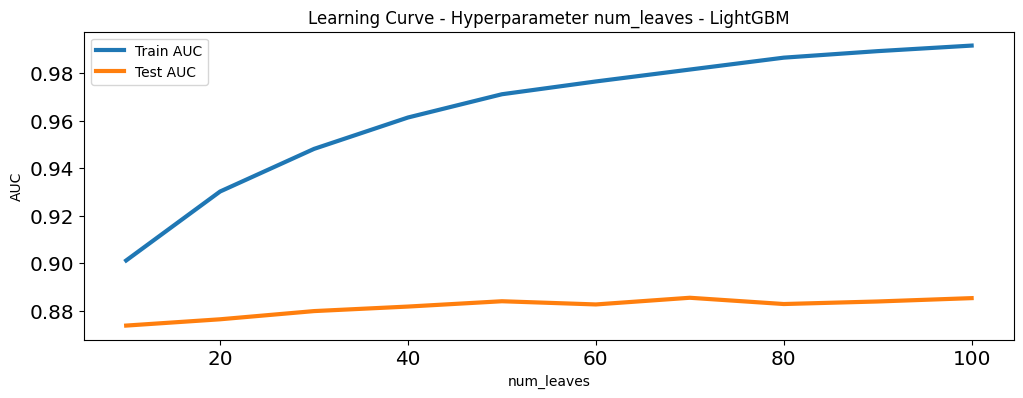

In [127]:
def draw_learning_curve_lgbm(param_values):
    train_scores = []
    test_scores = []

    for num_leaves in param_values:
        # Membuat model LGBM dengan parameter num_leaves yang berbeda-beda
        model = LGBMClassifier(num_leaves=num_leaves, random_state=7391)
        model.fit(X_train, y_train)

        # Evaluasi pada training set
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        # Evaluasi pada test set
        y_pred_test_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_test_proba[:, 1])
        test_scores.append(test_auc)

        print(f'num_leaves: {num_leaves}; Train AUC: {train_auc}; Test AUC: {test_auc}')

    # Plotting Learning Curve
    plt.plot(param_values, train_scores, label='Train AUC')
    plt.plot(param_values, test_scores, label='Test AUC')
    plt.xlabel('num_leaves')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter num_leaves - LightGBM')
    plt.legend()
    plt.show()

# Rentang nilai untuk num_leaves
param_values = [int(x) for x in np.linspace(10, 100, 10)]
draw_learning_curve_lgbm(param_values)

[LightGBM] [Info] Number of positive: 25367, number of negative: 25367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 50734, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
num_leaves: 10; Train AUC: 0.9024948478610966; Test AUC: 0.8714466971414425
[LightGBM] [Info] Number of positive: 25367, number of negative: 25367
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 695
[LightGBM] [Info] Number of data points in the train set: 50734, number of used features: 37

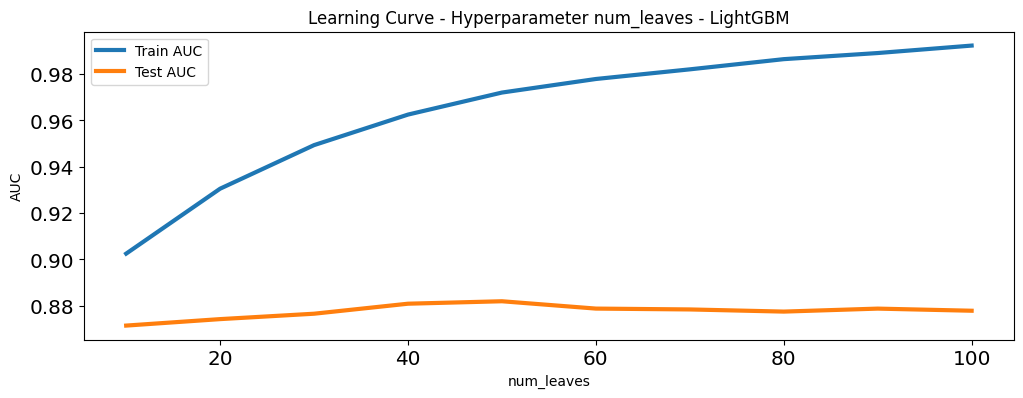

In [128]:
def draw_learning_curve_lgbm(param_values):
    train_scores = []
    test_scores = []

    for num_leaves in param_values:
        # Membuat model LGBM dengan parameter num_leaves yang berbeda-beda
        model = LGBMClassifier(num_leaves=num_leaves, random_state=7391)
        model.fit(X_train_over, y_train_over)

        # Evaluasi pada training set
        y_pred_train_proba = model.predict_proba(X_train_over)
        train_auc = roc_auc_score(y_train_over, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        # Evaluasi pada test set
        y_pred_test_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_test_proba[:, 1])
        test_scores.append(test_auc)

        print(f'num_leaves: {num_leaves}; Train AUC: {train_auc}; Test AUC: {test_auc}')

    # Plotting Learning Curve
    plt.plot(param_values, train_scores, label='Train AUC')
    plt.plot(param_values, test_scores, label='Test AUC')
    plt.xlabel('num_leaves')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter num_leaves - LightGBM')
    plt.legend()
    plt.show()

# Rentang nilai untuk num_leaves
param_values = [int(x) for x in np.linspace(10, 100, 10)]
draw_learning_curve_lgbm(param_values)

## Feature Importance

In [129]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

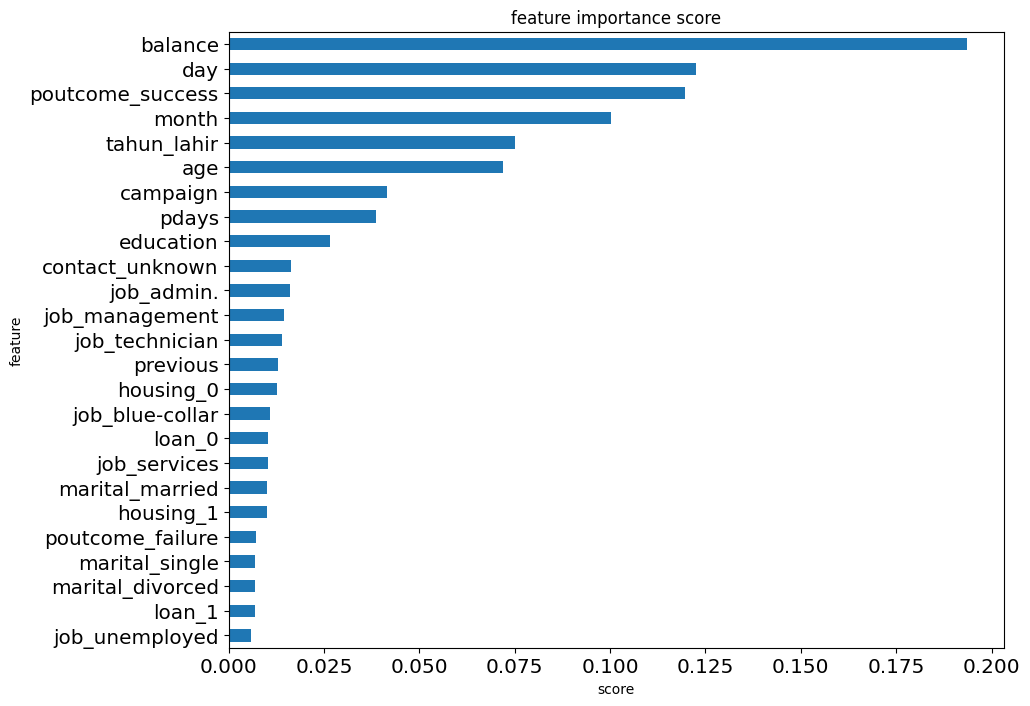

In [130]:
show_feature_importance(tree)

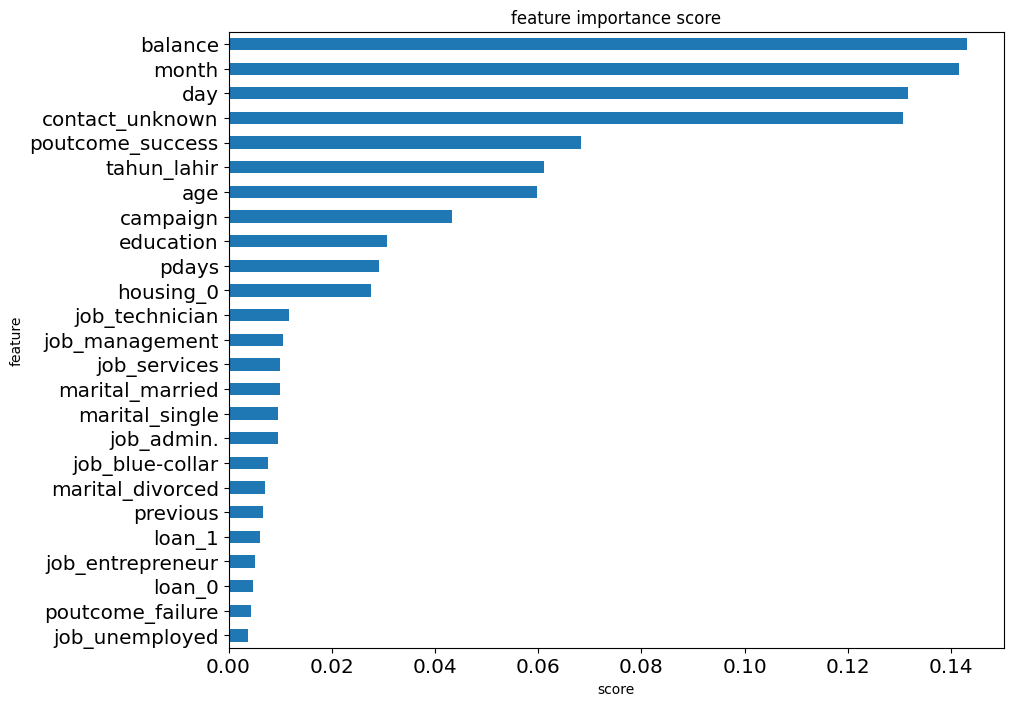

In [131]:
show_feature_importance(tree_over)

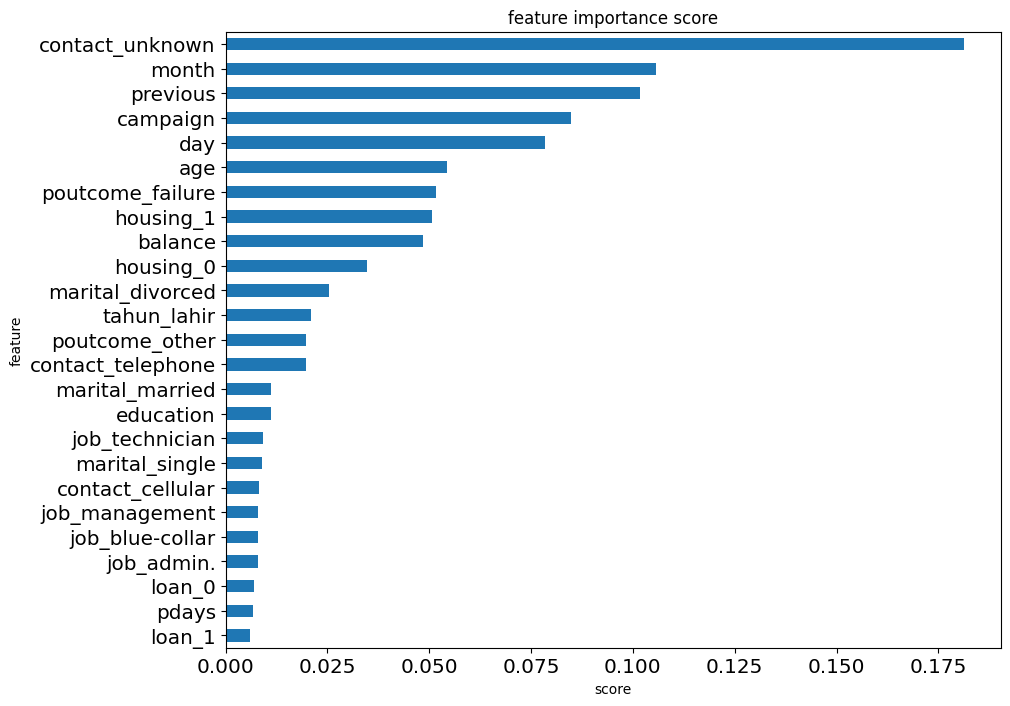

In [132]:
show_feature_importance(tree_SMOTE)

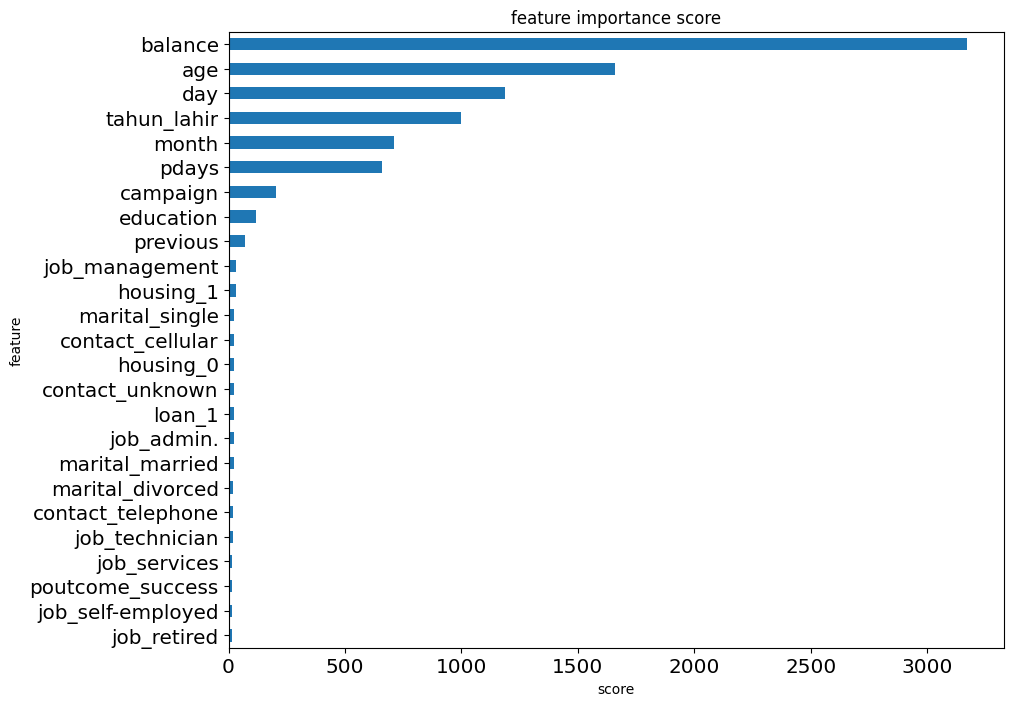

In [133]:
show_feature_importance(LGBM_over_tuning)

## BEFORE MODELING

In [176]:
data_update['y'].value_counts(normalize=True) * 100

0    92.225583
1     7.774417
Name: y, dtype: float64

## AFTER MODELINGS

In [158]:
# Pastikan data_update hanya memiliki fitur yang sama dengan X_train
data_update_2 = data_update[X_train.columns]
data_update_2

,age,education,balance,day,month,campaign,pdays,previous,tahun_lahir,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.769231,3,0.755981,5,5,0.0,0.000000,0.0,1966,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1
1,0.500000,2,0.366949,5,5,0.0,0.000000,0.0,1980,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1
2,0.288462,2,0.361980,5,5,0.0,0.000000,0.0,1991,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1
3,0.557692,0,0.638756,5,5,0.0,0.000000,0.0,1977,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1
4,0.288462,0,0.361796,5,5,0.0,0.000000,0.0,1991,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49724,0.596154,2,0.420869,14,8,0.2,0.000000,0.0,1975,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
49725,0.384615,2,0.583364,20,4,0.6,0.614458,0.2,1986,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0
49726,0.269231,2,0.448657,7,7,0.8,0.000000,0.0,1992,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1
49727,0.288462,2,0.300331,30,7,0.8,0.000000,0.0,1991,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1


In [163]:
# Lakukan prediksi pada data_update
y_pred = LGBM_over_tuning.predict(data_update_2)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [170]:
# Menambahkan hasil prediksi sebagai kolom baru di data_update
data_update_2['prediksi'] = y_pred

In [165]:
data_update_2

,age,education,balance,day,month,campaign,pdays,previous,tahun_lahir,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,prediksi
0,0.769231,3,0.755981,5,5,0.0,0.000000,0.0,1966,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0
1,0.500000,2,0.366949,5,5,0.0,0.000000,0.0,1980,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0
2,0.288462,2,0.361980,5,5,0.0,0.000000,0.0,1991,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0
3,0.557692,0,0.638756,5,5,0.0,0.000000,0.0,1977,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0
4,0.288462,0,0.361796,5,5,0.0,0.000000,0.0,1991,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49724,0.596154,2,0.420869,14,8,0.2,0.000000,0.0,1975,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
49725,0.384615,2,0.583364,20,4,0.6,0.614458,0.2,1986,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0
49726,0.269231,2,0.448657,7,7,0.8,0.000000,0.0,1992,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0
49727,0.288462,2,0.300331,30,7,0.8,0.000000,0.0,1991,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0


In [178]:
data_update_2['prediksi'].value_counts(normalize=True) * 100

0    89.130941
1    10.869059
Name: prediksi, dtype: float64

## VISUALISASI Before & After Modeling

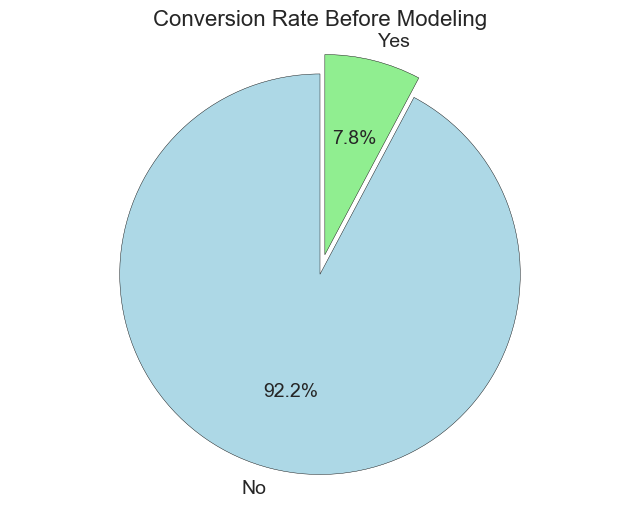

In [183]:
conversion_counts = data_update['y'].value_counts()
conversion_labels = ['No', 'Yes']
conversion_percentages = conversion_counts / conversion_counts.sum() * 100

# Memperbesar irisan untuk 'Yes'
explode = (0, 0.1)

plt.figure(figsize=(8, 6))
plt.pie(conversion_percentages, explode=explode, labels=conversion_labels, 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], 
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})

plt.title('Conversion Rate Before Modeling', fontsize=16)
plt.axis('equal')
plt.show()

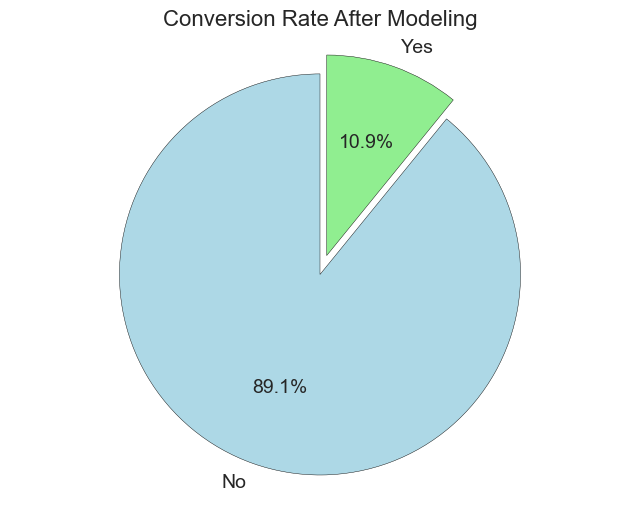

In [185]:
conversion_counts = data_update_2['prediksi'].value_counts()
conversion_labels = ['No', 'Yes']
conversion_percentages = conversion_counts / conversion_counts.sum() * 100

# Memperbesar irisan untuk 'Yes'
explode = (0, 0.1)

plt.figure(figsize=(8, 6))
plt.pie(conversion_percentages, explode=explode, labels=conversion_labels, 
        autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], 
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 14})

plt.title('Conversion Rate After Modeling', fontsize=16)
plt.axis('equal')
plt.show()

## Feature Importance (SHAP)

In [136]:
import shap

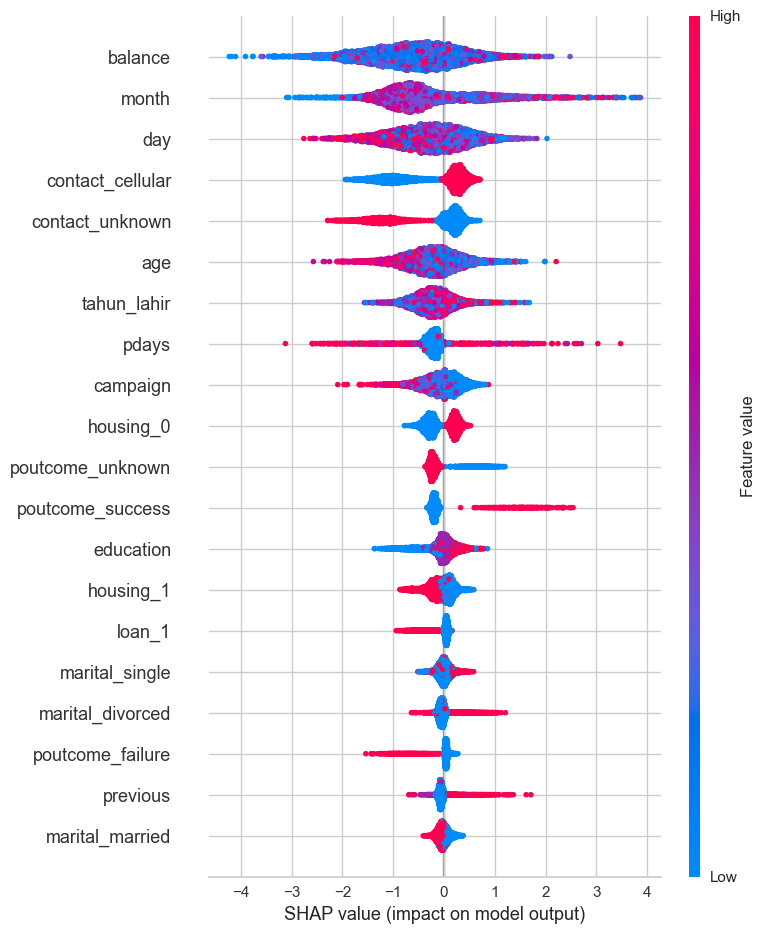

In [148]:
explainer = shap.TreeExplainer(LGBM_over_tuning)

shap_values = explainer.shap_values(X_test)

# Untuk klasifikasi biner, gunakan shap_values[1] jika kelas target adalah 'yes'
# Pastikan X_test juga berbentuk DataFrame
if isinstance(shap_values, list):
    shap_values_for_plot = shap_values[1]  # Untuk kelas positif 'yes'
else:
    shap_values_for_plot = shap_values  # Jika shap_values bukan list, gunakan langsung

# Plot SHAP summary plot (pengaruh setiap fitur terhadap output model)
shap.summary_plot(shap_values_for_plot, X_test)

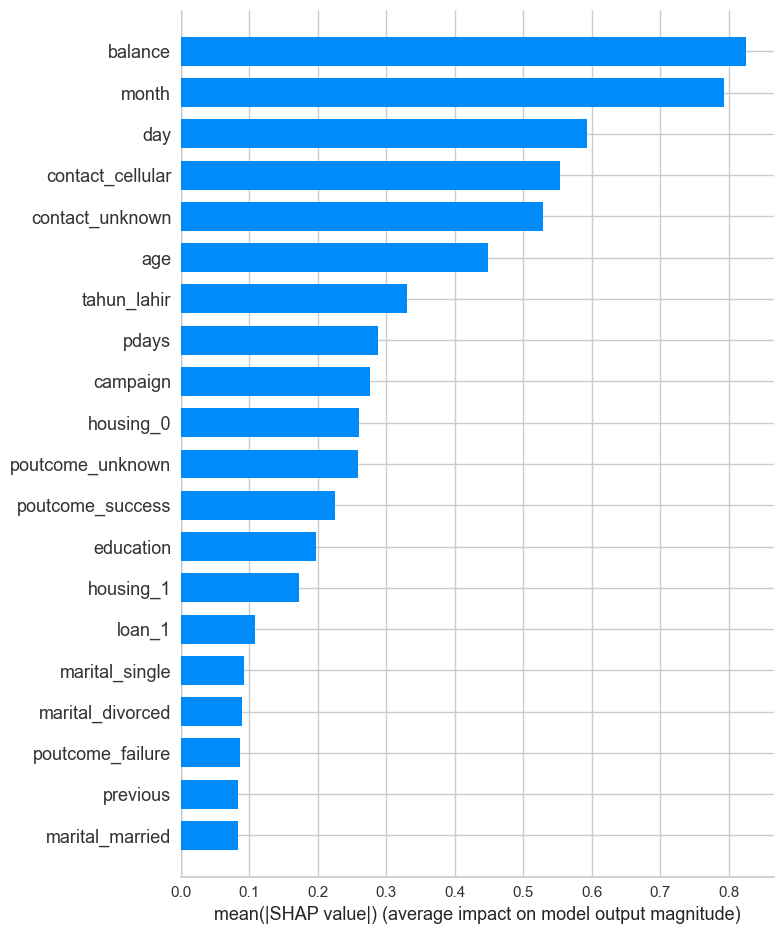

In [150]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [151]:
# Plot untuk satu contoh
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

# SAVE FILE

In [ ]:
## Buka Komen apabila ingin simpan excelnya

# data.to_excel('output_sementara.xlsx', index=False)

# SAVE MODEL

In [188]:
# ## Buka Komen apabila ingin simpan modelnya

# import joblib

# joblib.dump(LGBM_over_tuning, 'LGBM_over_tuning_model.pkl')

['LGBM_over_tuning_model.pkl']

In [189]:
# LGBM_over_tuning_loaded = joblib.load('LGBM_over_tuning_model.pkl')

In [ ]:
# y_pred = LGBM_over_tuning_loaded.predict(data_update_2)